# Project 6 : Machine Learning

### Importing all the Required Libraries

In [1]:
import pandas as pd
import numpy as np

# importing ploting libraries
import matplotlib.pyplot as plt 

#importing seaborn for statistical plots
import seaborn as sns

# To split the dataset into train and test datasets
from sklearn.model_selection import train_test_split,GridSearchCV 

# calculate accuracy measures and confusion matrix
from sklearn import metrics

# importing zscore for scaling
from scipy.stats import zscore

# importing auc, roc, classification report & confusion matrix
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix

## Problem 1:

### You are hired by one of the leading news channels CNBE who wants to analyze recent elections. This survey was conducted on 1525 voters with 9 variables. You have to build a model, to predict which party a voter will vote for on the basis of the given information, to create an exit poll that will help in predicting overall win and seats covered by a particular party.

### Data Dictionary:

1. **vote:** Party choice: Conservative or Labour
2. **age:** in years
3. **economic.cond.national:** Assessment of current national economic conditions, 1 to 5.
4. **economic.cond.household:** Assessment of current household economic conditions, 1 to 5.
5. **Blair:** Assessment of the Labour leader, 1 to 5.
6. **Hague:** Assessment of the Conservative leader, 1 to 5.
7. **Europe:** an 11-point scale that measures respondents' attitudes toward European integration. High scores represent ‘Eurosceptic’ sentiment.
8. **political.knowledge:** Knowledge of parties' positions on European integration, 0 to 3.
9. **gender:** female or male.


### Data Ingestion:

### 1.1 Read the dataset. Do the descriptive statistics and do the null value condition check. Write an inference on it.

#### Load the dataset

In [2]:
df1 = pd.read_excel('Election_Data.xlsx', sheet_name = 'Election_Dataset_Two Classes' )

#### Checking the Top 5 Records

In [3]:
df1.head()

,Unnamed: 0,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,1,Labour,43,3,3,4,1,2,2,female
1,2,Labour,36,4,4,4,4,5,2,male
2,3,Labour,35,4,4,5,2,3,2,male
3,4,Labour,24,4,2,2,1,4,0,female
4,5,Labour,41,2,2,1,1,6,2,male


#### Checking the Bottom 5 Records

In [4]:
df1.tail()

,Unnamed: 0,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
1520,1521,Conservative,67,5,3,2,4,11,3,male
1521,1522,Conservative,73,2,2,4,4,8,2,male
1522,1523,Labour,37,3,3,5,4,2,2,male
1523,1524,Conservative,61,3,3,1,4,11,2,male
1524,1525,Conservative,74,2,3,2,4,11,0,female


In [5]:
# from the above data set you can see that the first column 'Unnamed:0' consists of only index numbers,
# hence that column is not much of use for our modelling. Hence we will be dropping the column

df1 = df1.drop('Unnamed: 0', axis = 1)

#### Dataset after dropping the unwated column

In [6]:
df1.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,Labour,43,3,3,4,1,2,2,female
1,Labour,36,4,4,4,4,5,2,male
2,Labour,35,4,4,5,2,3,2,male
3,Labour,24,4,2,2,1,4,0,female
4,Labour,41,2,2,1,1,6,2,male


#### Checking the Shape of the Dataset 

In [7]:
r, c = df1.shape
print('No of Rows in the dataset :', r)
print('No of Columns in the dataset :', c)

No of Rows in the dataset : 1525
No of Columns in the dataset : 9


#### Checking the info of the Dataset

In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   vote                     1525 non-null   object
 1   age                      1525 non-null   int64 
 2   economic.cond.national   1525 non-null   int64 
 3   economic.cond.household  1525 non-null   int64 
 4   Blair                    1525 non-null   int64 
 5   Hague                    1525 non-null   int64 
 6   Europe                   1525 non-null   int64 
 7   political.knowledge      1525 non-null   int64 
 8   gender                   1525 non-null   object
dtypes: int64(7), object(2)
memory usage: 107.4+ KB


#### From the above we can say the following 

1. After dropping the first column, the data set consist of **9 variables** and **1,525 observations**. 
2. From the above data set we can that only age is of Continuous variable and others are categorical variable but are in integer form in the given data set which we need to convert to categorical. 
3. From the above data set we can say that ‘vote’ is the Target variable with two categories and balance 8 variables are the independent variable or predictor variable which will be used for model building. 
4. From the given dictionary we can say that there are two parties i.e., Conservative & Labour


In [9]:
df_corr = df1.copy() # For Plotting Correlation Matrix

#### Since the following variables (economic.cond.national, economic.cond.household, Blair, Hague, Europe & political.knowledge) are of integer type but actuals they are categorical, hence we will be converting them to categorical variables.

In [10]:
cat = ['economic.cond.national', 'economic.cond.household','Blair', 'Hague', 'Europe', 'political.knowledge']

In [11]:
for i in cat:
    df1[i]=df1[i].astype("object")

In [12]:
#Checking the info of the data set after converting it to categorical type

df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   vote                     1525 non-null   object
 1   age                      1525 non-null   int64 
 2   economic.cond.national   1525 non-null   object
 3   economic.cond.household  1525 non-null   object
 4   Blair                    1525 non-null   object
 5   Hague                    1525 non-null   object
 6   Europe                   1525 non-null   object
 7   political.knowledge      1525 non-null   object
 8   gender                   1525 non-null   object
dtypes: int64(1), object(8)
memory usage: 107.4+ KB


#### Checking the summary of the dataset for Continuous Variable

In [13]:
df1.describe()

,age
count,1525.000000
mean,54.182295
std,15.711209
min,24.000000
25%,41.000000
50%,53.000000
75%,67.000000
max,93.000000


From the above summary we can say the following
1. There are about 1,525 voters
2. Minimum age of the voter is 24 and Maximum age is 93
3. Mean age of the voter is around 54

#### Checking the summary of the dataset for Categorical Variable

In [14]:
df1[['economic.cond.national', 'economic.cond.household','Blair', 'Hague', 'Europe', 'political.knowledge', 'gender']].describe().T

,count,unique,top,freq
economic.cond.national,1525,5,3,607
economic.cond.household,1525,5,3,648
Blair,1525,5,4,836
Hague,1525,5,2,624
Europe,1525,11,11,338
political.knowledge,1525,4,2,782
gender,1525,2,female,812


From the above summary we can say the following

1. In National Economic Conditions there are '5' unique values ranging from 1 to 5 where 1 is worst and 5 is best and '3' is frequently repeated that is around 607 times.
2. In Household Economic Conditions there are '5' unique values ranging from 1 to 5 where 1 is worst and 5 is best and '3' is frequently repeated that is around 648 times.
3. In Blair ('Assessment of Labour Leader') there are '5' unique values ranging from 1 to 5 where 1 is worst and 5 is best and '4' is frequently repeated that is around 836 times. As you can see most of the voters rated the Labour Leader with 4 which is higesh rating
4. In Hague ('Assessment of Conservative Leader') there are '5' unique values ranging from 1 to 5 where 1 is worst and 5 is best and '2' is frequently repeated that is around 624 times.As you can see most of the voters rated the Conservative Leader with 2, which is lowest. 
5. In Europe ('A 11 point scale) there are 11 scale values ranging from 1 to 11 and '11' scale is repeated most frequently that is 338 times.
6. In Political Knowledge scale ranging from 0 to 3 and '2' is repeated most frequently i.e. around 782 times. 
7. They are two unique data in gender i.e. Male & Female where female voters are higher i.e. around 812.

#### Checking for any missing values

In [15]:
def missing_check(df1):
    total = df1.isnull().sum().sort_values(ascending=False)  
    percent = (df1.isnull().sum()/df1.isnull().count()).sort_values(ascending=False)  
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])  
    return missing_data
missing_check(df1)

,Total,Percent
gender,0,0.0
political.knowledge,0,0.0
Europe,0,0.0
Hague,0,0.0
Blair,0,0.0
economic.cond.household,0,0.0
economic.cond.national,0,0.0
age,0,0.0
vote,0,0.0


From the above we can say that there are no null values present. 

#### Checking for any duplicate values

In [16]:
dups = df1.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 8


In [17]:
df1[dups]

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
67,Labour,35,4,4,5,2,3,2,male
626,Labour,39,3,4,4,2,5,2,male
870,Labour,38,2,4,2,2,4,3,male
983,Conservative,74,4,3,2,4,8,2,female
1154,Conservative,53,3,4,2,2,6,0,female
1236,Labour,36,3,3,2,2,6,2,female
1244,Labour,29,4,4,4,2,2,2,female
1438,Labour,40,4,3,4,2,2,2,male


We can see that there are **8 duplicate rows**, since the number is less we can drop the duplicate rows. 

#### Dropping duplicate rows 

In [18]:
df1.drop_duplicates(inplace=True)
dups1 = df1.duplicated().sum()
print('Number of duplicate rows = %d' % (dups1.sum()))

Number of duplicate rows = 0


In [19]:
df1.shape

(1517, 9)

We can see we have dropped the duplicate values in the data set, after dropping we will be having **1,517 observations** and **9 variables**

#### Checking Unique Values for Categorical Variables

In [20]:
for column in df1.columns:
    if df1[column].dtype == 'object':
        print(column.upper(),': ',df1[column].nunique())
        print(df1[column].value_counts().sort_values())
        print('\n')

VOTE :  2
Conservative     460
Labour          1057
Name: vote, dtype: int64


ECONOMIC.COND.NATIONAL :  5
1     37
5     82
2    256
4    538
3    604
Name: economic.cond.national, dtype: int64


ECONOMIC.COND.HOUSEHOLD :  5
1     65
5     92
2    280
4    435
3    645
Name: economic.cond.household, dtype: int64


BLAIR :  5
3      1
1     97
5    152
2    434
4    833
Name: Blair, dtype: int64


HAGUE :  5
3     37
5     73
1    233
4    557
2    617
Name: Hague, dtype: int64


EUROPE :  11
2      77
7      86
10    101
1     109
9     111
8     111
5     123
4     126
3     128
6     207
11    338
Name: Europe, dtype: int64


POLITICAL.KNOWLEDGE :  4
1     38
3    249
0    454
2    776
Name: political.knowledge, dtype: int64


GENDER :  2
male      709
female    808
Name: gender, dtype: int64




### 1.2 Perform Univariate and Bivariate Analysis. Do exploratory data analysis. Check for Outliers

#### Univariate Analysis : Distplot

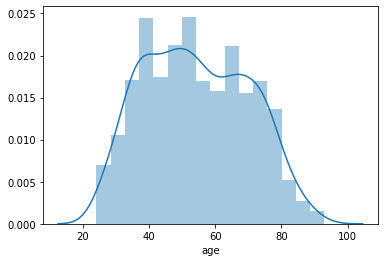

In [21]:
sns.distplot(df1['age'])

From the above distribution plot we can say the following

1. Age is Normally Distributed with Age ranging from 25 to 90
2. Age Between 40-70 contributed highest number of voters

#### Distribution of Vote : Using Pie-Plot

In [22]:
count = df1['vote'].value_counts()
labels = df1['vote'].unique()

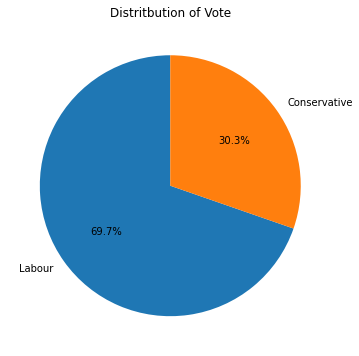

In [23]:
plt.figure(figsize=(10,6))
plt.pie(count,labels = labels, startangle=90, autopct='%.1f%%')
plt.title('Distritbution of Vote',fontsize = 12)
plt.show()

From the above plot we can say that Labour Party has 69.7% of votes and Conservative has 30.3% of Votes

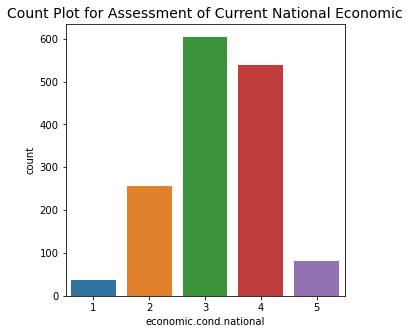

In [25]:
plt.figure(figsize=(5,5))
sns.countplot(df1['economic.cond.national'])
plt.title("Count Plot for Assessment of Current National Economic", fontsize = 14)
plt.show()

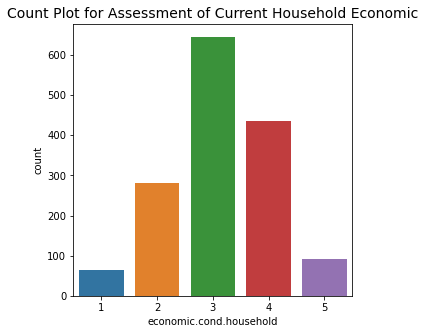

In [26]:
plt.figure(figsize=(5,5))
sns.countplot(df1['economic.cond.household'])
plt.title("Count Plot for Assessment of Current Household Economic", fontsize = 14)
plt.show()

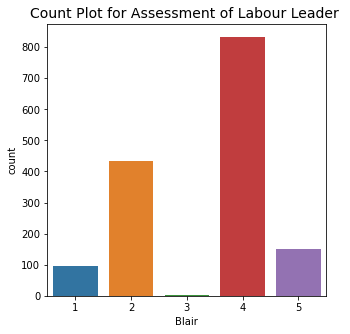

In [27]:
plt.figure(figsize=(5,5))
sns.countplot(df1['Blair'])
plt.title("Count Plot for Assessment of Labour Leader ", fontsize = 14)
plt.show()

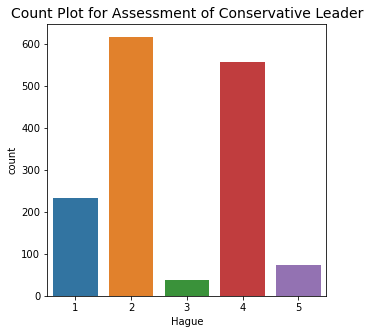

In [28]:
plt.figure(figsize=(5,5))
sns.countplot(df1['Hague'])
plt.title("Count Plot for Assessment of Conservative Leader", fontsize = 14)
plt.show()

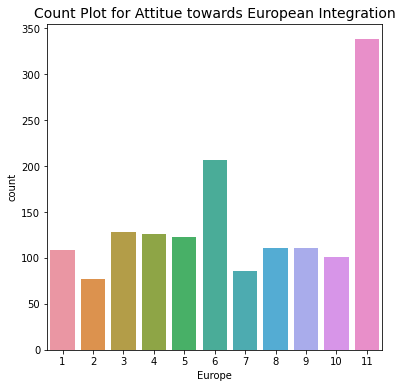

In [29]:
plt.figure(figsize=(6,6))
sns.countplot(df1['Europe'])
plt.title("Count Plot for Attitue towards European Integration", fontsize = 14)
plt.show()

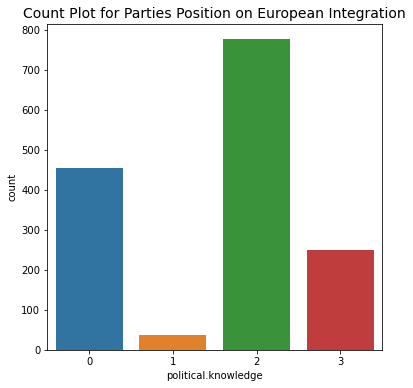

In [30]:
plt.figure(figsize=(6,6))
sns.countplot(df1['political.knowledge'])
plt.title("Count Plot for Parties Position on European Integration", fontsize = 14)
plt.show()

From the above plots we can see the following

1. In Assessment of current national economic conditions, most of the voters have given 3&4.
2. In Assessment of current household economic conditions, most of the voters have given 3&4.
3. Most of the voters have assessed the Labour leader with 4, i.e., around 800 voters.
4. Most of the voters have assessed the Conservative leader with 2 & 4, highest rating being 2 with approximately 600 voters. 
5. In the voter’s respondent towards European integration attitude toward European integration chart, around 350 voters have given scale rating of 11 and around 200 voters have given scale rating of 6.
6. In Political Knowledge chart most of the voters given rating of 2 & 3.


#### Bi-variate Analysis

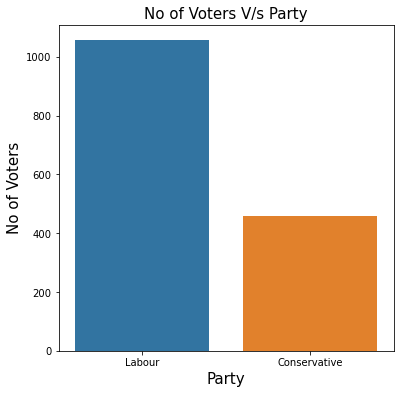

In [30]:
plt.figure(figsize=(6,6))
sns.countplot(df1['vote'])
plt.ylabel('No of Voters',fontsize = 15)
plt.xlabel('Party',fontsize = 15)
plt.title('No of Voters V/s Party',fontsize = 15)
plt.show()

From the above plot we can say that more than 1000 people have voted for Labour Party and around 450 people voted for Conservative Party

#### Party Choice & Gender V/s No Of Voters 

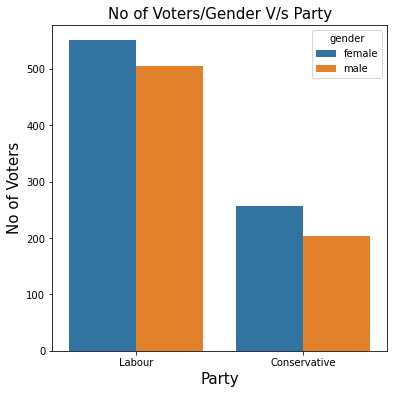

In [31]:
plt.figure(figsize=(6,6))
sns.countplot(df1['vote'], hue = df1['gender'])
plt.ylabel('No of Voters',fontsize = 15)
plt.xlabel('Party',fontsize = 15)
plt.title('No of Voters/Gender V/s Party',fontsize = 15)
plt.show()

Labour Party gets highest proportion of votes from both Female & Male

#### Age V/s Party Choice

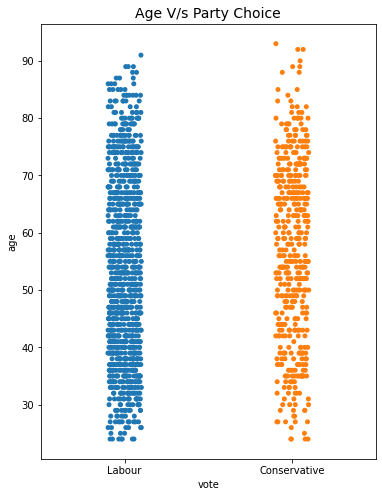

In [32]:
plt.figure(figsize = (6,8))
sns.stripplot(df1['vote'],df1['age'])
plt.title("Age V/s Party Choice", fontsize = 14)
plt.show()

From the above plot we can say that almost all age groups have voted for both parties, where the density of voters are more for labour party

#### Gender V/s Age

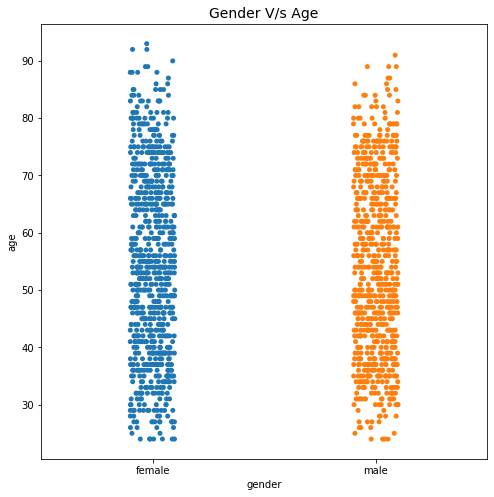

In [33]:
plt.figure(figsize = (8,8))
sns.stripplot(df1['gender'],df1['age'])
plt.title("Gender V/s Age", fontsize = 14)
plt.show()

#### Age V/s Political Knowledge

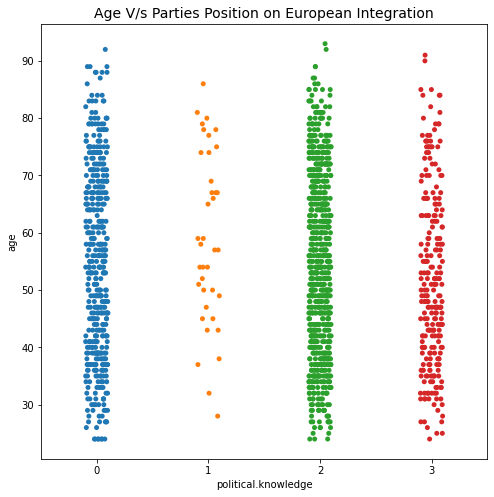

In [34]:
plt.figure(figsize = (8,8))
sns.stripplot(df1['political.knowledge'],df1['age'])
plt.title("Age V/s Parties Position on European Integration", fontsize = 14)
plt.show()

From the above plot we can see that mostly, voters of all ages are aware of the party's position of European Integration

#### Boxplot for Age

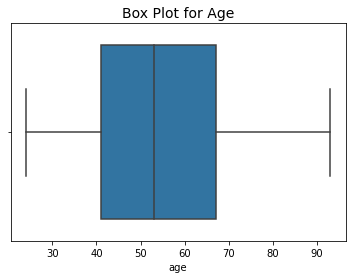

In [35]:
sns.boxplot(df1['age'])
plt.title("Box Plot for Age", fontsize = 14)
plt.show()

From the above plot age is equally distributed and has no outliers

#### Multivariate Analysis : Pair Plot

C:\Users\Sastry\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\Sastry\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


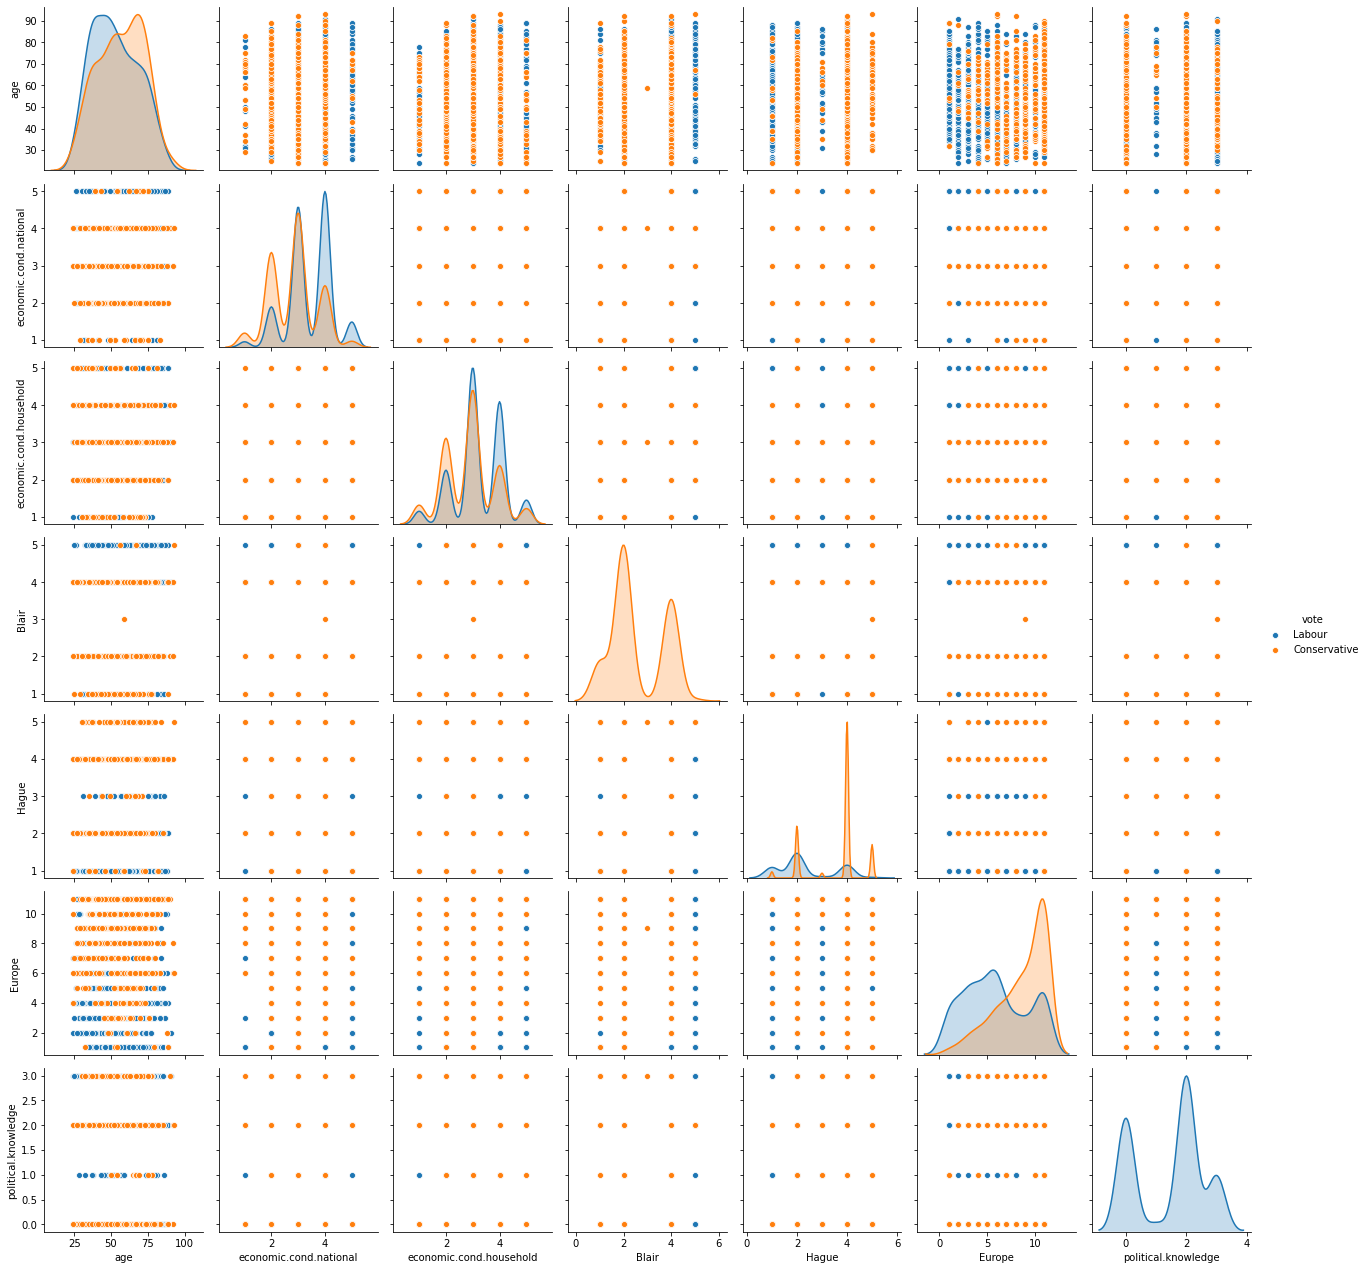

In [36]:
sns.pairplot(df1, hue = 'vote' )

From the above Pair-Plot we can say the following 
1. Age is Normally distributed
2. National economic condition looks normal with multiple peaks
3. Household economic condition looks normal with multiple peaks
4. Blair looks normal with two peaks
5. Hague looks normal with multiple peaks
6. Political Knowledge looks normal with multiple peaks


#### Heatmap for Checking Correlation Between Variables

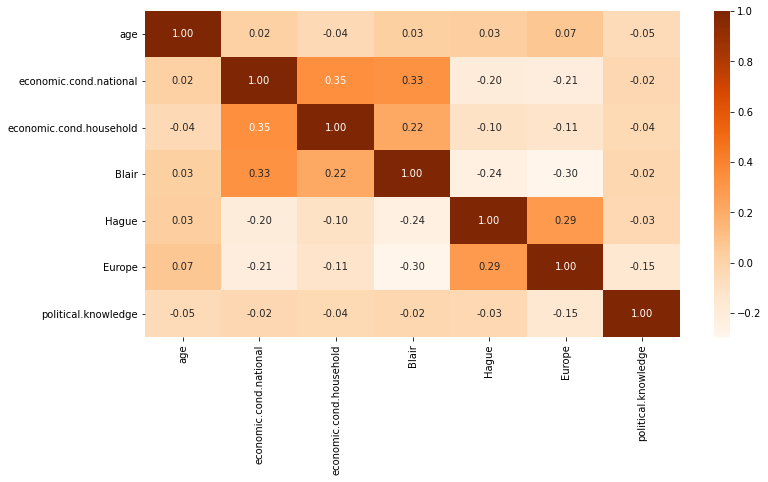

In [37]:
corr = df_corr.corr()
plt.figure(figsize=(12,6))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='Oranges',xticklabels='auto', yticklabels='auto')
plt.show()

From the above heat map we can say the following

1. There is no multi-collinearity amount variables.
2. Ratings of House-hold Economic conditions is marginally having postive correlation with National Economic conditions.
3. Similarly there is marginal positive correlation between Ratings of National Economic conditions with Blair.

#### Boxplot for checking any outliers present in the data set 

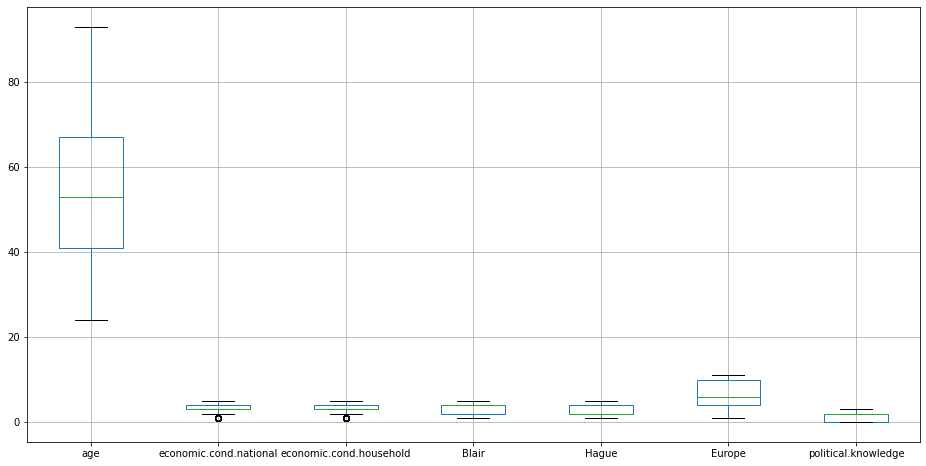

In [38]:
df_corr.boxplot(figsize = (16,8))

From the above box plot we can see that there are no major outliers present in the data set

### Data Preparation:

### 1.3 Encode the data (having string values) for Modelling. Is Scaling necessary here or not? Data Split: Split the data into train and test (70:30)

#### Data Encoding

In [39]:
df1.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,Labour,43,3,3,4,1,2,2,female
1,Labour,36,4,4,4,4,5,2,male
2,Labour,35,4,4,5,2,3,2,male
3,Labour,24,4,2,2,1,4,0,female
4,Labour,41,2,2,1,1,6,2,male


From the above data set we can see that variable 'vote' and 'gender' are of categorical having string values. In order to build the model we need to do categorical encoding. 

**Categorical Encoding**: Categorical encoding is a process of converting categories to numbers.

Different approaches for Categorical Encoding

1. **Label Encoding** : Label Encoding is a popular encoding technique for handling categorical variables. In this technique, each label is assigned a unique integer based on alphabetical ordering or ordinal.

2. **One Hot Encoding** : One-Hot Encoding is another popular technique for treating categorical variables. It simply creates additional features based on the number of unique values in the categorical feature. Every unique value in the category will be added as a feature.

In our case we will be proceeding with one hot encoding for Gender & Vote. For balance categorical variables we will be doing label encoding

In [40]:
categorical = ['vote', 'gender'] # Since Gender and Vote are not ordinal we will be using one hot encoding

df1 = pd.get_dummies(df1, columns = categorical, drop_first = True)

#### Converting Balance Categorical Variables into Numerical

In [41]:
for feature in df1.columns:
    if df1[feature].dtype == 'object':
        print('\n')
        print('feature:', feature)
        print(pd.Categorical(df1[feature].unique()))
        print(pd.Categorical(df1[feature].unique()).codes)
        df1[feature] = pd.Categorical(df1[feature]).codes



feature: economic.cond.national
[3, 4, 2, 1, 5]
Categories (5, int64): [1, 2, 3, 4, 5]
[2 3 1 0 4]


feature: economic.cond.household
[3, 4, 2, 1, 5]
Categories (5, int64): [1, 2, 3, 4, 5]
[2 3 1 0 4]


feature: Blair
[4, 5, 2, 1, 3]
Categories (5, int64): [1, 2, 3, 4, 5]
[3 4 1 0 2]


feature: Hague
[1, 4, 2, 5, 3]
Categories (5, int64): [1, 2, 3, 4, 5]
[0 3 1 4 2]


feature: Europe
[2, 5, 3, 4, 6, ..., 1, 7, 9, 10, 8]
Length: 11
Categories (11, int64): [1, 2, 3, 4, ..., 8, 9, 10, 11]
[ 1  4  2  3  5 10  0  6  8  9  7]


feature: political.knowledge
[2, 0, 3, 1]
Categories (4, int64): [0, 1, 2, 3]
[2 0 3 1]


#### Scaling the data

In [42]:
df1.head()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,vote_Labour,gender_male
0,43,2,2,3,0,1,2,1,0
1,36,3,3,3,3,4,2,1,1
2,35,3,3,4,1,2,2,1,1
3,24,3,1,1,0,3,0,1,0
4,41,1,1,0,0,5,2,1,1


From the above data we can see that age is of double digits and rest of other variables are of single digits. However scaling doesnt have impact on Logistic Regression/LDA. Since KNN model is distance based algorithm, scaling need to be done. Hence we will be doing scaling for the age variable

In [43]:
df1['age'] = df1[['age']].apply(zscore) # Scaling the age variable using zscore from scipy.stats library

In [44]:
df1.head() # Data set after scaling Age variable

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,vote_Labour,gender_male
0,-0.716161,2,2,3,0,1,2,1,0
1,-1.162118,3,3,3,3,4,2,1,1
2,-1.225827,3,3,4,1,2,2,1,1
3,-1.926617,3,1,1,0,3,0,1,0
4,-0.843577,1,1,0,0,5,2,1,1


#### Data Split: 

First step is to separate the Target Variable , we will be dropping the Target from the dataset and assigning it to variable 'X' and pop in another variable 'y'

In [45]:
X = df1.drop('vote_Labour',axis=1) #Copy all predictor variables into X dataframe

y = df1['vote_Labour'] # Copy target variable into the y dataframe

Now we will split the data in to train and test. The training data consists of 70% of the data and testing data consists of 30%.

In [46]:
X_train, X_test,y_train,y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

In [47]:
X_train.head()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender_male
991,-1.289535,1,3,0,3,10,2,0
1274,-0.907286,3,2,3,3,5,0,1
649,0.430587,3,2,3,3,6,2,0
677,-0.461328,2,2,3,1,10,0,1
538,-0.652453,4,2,3,1,7,0,1


In [48]:
X_train.shape

(1061, 8)

In [49]:
X_test.head()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender_male
504,1.067669,2,2,1,1,7,2,0
369,-0.716161,2,1,3,1,7,3,1
1075,2.214417,4,4,4,1,0,2,1
1031,-0.461328,1,2,1,3,7,2,0
1329,-1.353243,4,3,3,3,7,0,1


In [50]:
X_test.shape

(456, 8)

In [51]:
y_train.value_counts(normalize = True) # Checking the unique values of Target variable in Training Set

1    0.71065
0    0.28935
Name: vote_Labour, dtype: float64

In [52]:
y_test.value_counts(normalize = True) # Checking the unique values of Target variable in Test Set

1    0.664474
0    0.335526
Name: vote_Labour, dtype: float64

### Modeling:

### 1.4 Apply Logistic Regression and LDA (linear discriminant analysis)

### Logistic Regression: 

In [53]:
from sklearn.linear_model import LogisticRegression #Importing Logistic Regression from Sklearn library

In [54]:
#Creating Logistic Regression Model with default parameters

lgr_model = LogisticRegression(solver = 'newton-cg', max_iter = 3000, penalty = 'none', verbose = True, n_jobs = -1, random_state = 1)

# Fitting the model into the Training Data Set
lgr_model.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    5.8s finished


LogisticRegression(max_iter=3000, n_jobs=-1, penalty='none', random_state=1,
                   solver='newton-cg', verbose=True)

In [55]:
for idx, col_name in enumerate(X_train.columns):
    print('The coeff of {} is {}'.format(col_name, lgr_model.coef_[0][idx]))

The coeff of age is -0.2354175928898455
The coeff of economic.cond.national is 0.6375859258584184
The coeff of economic.cond.household is 0.06123036423892158
The coeff of Blair is 0.6045934756735092
The coeff of Hague is -0.8294485069901592
The coeff of Europe is -0.21178547460952699
The coeff of political.knowledge is -0.3252373426867469
The coeff of gender_male is 0.19912296601084142


#### Predicting on Training and Test dataset

In [56]:
ytrain_predict_lgr = lgr_model.predict(X_train)
ytest_predict_lgr = lgr_model.predict(X_test)

#### Performance Matrix on Training Data Set

Accuracy Score for Training Set is :  83.12912346842602




              precision    recall  f1-score   support

           0       0.74      0.64      0.69       307
           1       0.86      0.91      0.88       754

    accuracy                           0.83      1061
   macro avg       0.80      0.77      0.79      1061
weighted avg       0.83      0.83      0.83      1061



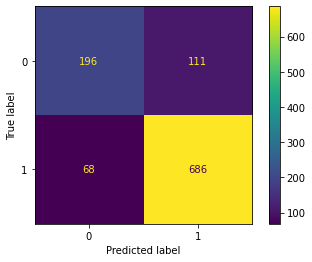

In [57]:
model_score_lgr = (lgr_model.score(X_train,y_train)*100)
print('Accuracy Score for Training Set is : ', model_score_lgr)
print('\n')
plot_confusion_matrix(lgr_model,X_train,y_train)
print('\n')
print(metrics.classification_report(y_train,ytrain_predict_lgr))

From the above we can say the following for Training,

1. Accuracy/Model score for Training Set is **83.12** which is shows that our model is perfoming good.
2. Precision for Labour (Class = 1) is **0.86** & Recall for Labour (Class = 1) is **0.91** which is performing good on our target variable.
3. From the confusion matrix we can see that our model predicted Labour (Class = 1) 686 times correctly which is good prediction on target varible

#### Performance Matrix on Test Data Set

Accuracy Score for Test Set is :  83.55263157894737




              precision    recall  f1-score   support

           0       0.76      0.74      0.75       153
           1       0.87      0.88      0.88       303

    accuracy                           0.84       456
   macro avg       0.82      0.81      0.81       456
weighted avg       0.83      0.84      0.83       456



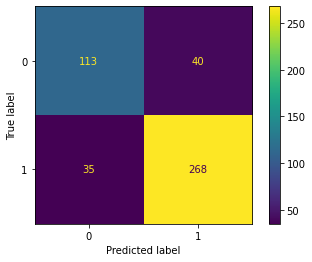

In [58]:
model_score_lgr_test = (lgr_model.score(X_test,y_test)*100)
print('Accuracy Score for Test Set is : ', model_score_lgr_test)
print('\n')
plot_confusion_matrix(lgr_model,X_test,y_test)
print('\n')
print(metrics.classification_report(y_test,ytest_predict_lgr))

From the above we can say the following for Test,

1. Accuracy/Model score for Test Set is **83.55** which is shows that our model is perfoming good.
2. Precision for Labour (Class = 1) is **0.87** & Recall for Labour (Class = 1) is **0.88** which shows that our model is predicting good on the target variable.
3. From the confusion matrix we can see that our model predicted Labour (Class = 1) 268 times correctly which is good prediction.

#### Comparision Between Training & Test data set: Logistic Regression

In [59]:
precision_train_lgr = 86
recall_train_lgr = 91
precision_test_lgr = 87
recall_test_lgr = 88

index = ['Accuracy','Precision','Recall']

lgr_data_compare = pd.DataFrame({'Log Regr Train' : [model_score_lgr,precision_train_lgr, recall_train_lgr],
                                 'Log Regr Test' :  [model_score_lgr_test,precision_test_lgr,recall_test_lgr ]}, index = index)
round(lgr_data_compare,2)

,Log Regr Train,Log Regr Test
Accuracy,83.13,83.55
Precision,86.00,87.00
Recall,91.00,88.00


### LDA (linear discriminant analysis)

In [60]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis #Importing LDA from Sklearn library

In [61]:
#Creating LDA Model with default parameters

lda_model = LinearDiscriminantAnalysis()

# Fitting the model into the Training Data Set
lda_model.fit(X_train,y_train)

LinearDiscriminantAnalysis()

#### Predicting on Training and Test dataset

In [62]:
ytrain_predict_lda = lda_model.predict(X_train)
ytest_predict_lda = lda_model.predict(X_test)

#### Performance Matrix on Training Data Set

Accuracy Score for Training Set is :  83.41187558906692




              precision    recall  f1-score   support

           0       0.74      0.65      0.69       307
           1       0.86      0.91      0.89       754

    accuracy                           0.83      1061
   macro avg       0.80      0.78      0.79      1061
weighted avg       0.83      0.83      0.83      1061



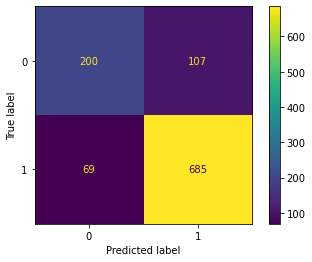

In [63]:
model_score_lda = (lda_model.score(X_train,y_train)*100)
print('Accuracy Score for Training Set is : ', model_score_lda)
print('\n')
plot_confusion_matrix(lda_model,X_train,y_train)
print('\n')
print(metrics.classification_report(y_train,ytrain_predict_lda))

From the above we can say the following for Training,

1. Accuracy/Model score for Training Set is **83.41** which is shows that our model is perfoming good.
2. Precision for Labour (Class = 1) is **0.86** & Recall for Labour (Class = 1) is **0.91** which is good.
3. From the confusion matrix we can see that our model predicted Labour (Class = 1) **685 times** correctly which is good prediction

#### Performance Matrix on Test Data Set

Accuracy Score for Test Set is :  83.33333333333334




              precision    recall  f1-score   support

           0       0.77      0.73      0.74       153
           1       0.86      0.89      0.88       303

    accuracy                           0.83       456
   macro avg       0.82      0.81      0.81       456
weighted avg       0.83      0.83      0.83       456



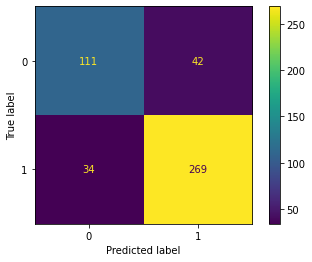

In [64]:
model_score_lda_test = (lda_model.score(X_test,y_test)*100)
print('Accuracy Score for Test Set is : ', model_score_lda_test)
print('\n')
plot_confusion_matrix(lda_model,X_test,y_test)
print('\n')
print(metrics.classification_report(y_test,ytest_predict_lda))

From the above we can say the following for Test data-set,

1. Accuracy/Model score for Test Set is **83.33** which is shows that our model is perfoming good.
2. Precision for Labour (Class = 1) is **0.86** & Recall for Labour (Class = 1) is **0.89** which shows that our model is predicting great in our test set.
3. From the confusion matrix we can see that our model predicted Labour (Class = 1) 269 times correctly which is good prediction

#### Comparision Between Training & Test data set: Linear Discriminant Analysis

In [65]:
precision_train_lda = 86
recall_train_lda = 91
precision_test_lda = 86
recall_test_lda = 89

index = ['Accuracy','Precision','Recall']

lda_data_compare = pd.DataFrame({'LDA Train' : [model_score_lda,precision_train_lda, recall_train_lda],
                                 'LDA Test' :  [model_score_lda_test,precision_test_lda,recall_test_lda ]}, index = index)
round(lda_data_compare,2)

,LDA Train,LDA Test
Accuracy,83.41,83.33
Precision,86.00,86.00
Recall,91.00,89.00


### Comparing Performace Matrix of Logistic Regression & Linear Discriminant Analysis 

In [66]:
index = ['Accuracy','Precision','Recall']

compare_lgr_lda = pd.DataFrame({ 'Log Regr Train' : [model_score_lgr,precision_train_lgr, recall_train_lgr],
                                 'Log Regr Test' :  [model_score_lgr_test,precision_test_lgr,recall_test_lgr],    
                                 'LDA Train' : [model_score_lda,precision_train_lda, recall_train_lda],
                                 'LDA Test' :  [model_score_lda_test,precision_test_lda,recall_test_lda ]}, index = index)
round(compare_lgr_lda,2)

,Log Regr Train,Log Regr Test,LDA Train,LDA Test
Accuracy,83.13,83.55,83.41,83.33
Precision,86.00,87.00,86.00,86.00
Recall,91.00,88.00,91.00,89.00


From the above table we can say the following

1. Accuracy score for both Logistic Regression & Linear Discriminant Analysis is almost same with marginal difference.
2. Precision for both Logistic Regression & Linear Discriminant Analysis is almost same with marginal difference.
3. Recall for both Logistic Regression & Linear Discriminant Analysis is almost same with marginal difference.
4. There is overfit/underfit issue

### 1.5 Apply KNN Model and Naïve Bayes Model. Interpret the results

### KNN Model

In [67]:
from sklearn.neighbors import KNeighborsClassifier #Importing KNN Model from sklearn library

In [68]:
#Creating KNN Model with default parameters, by default systems take k=5
KNN_model = KNeighborsClassifier(n_neighbors = 5, weights = 'uniform', algorithm = 'auto')

# Fitting the model into the Training Data Set
KNN_model.fit(X_train, y_train)

KNeighborsClassifier()

#### Predicting on Training and Test dataset

In [69]:
y_train_predict_KNN= KNN_model.predict(X_train)
y_test_predict_KNN = KNN_model.predict(X_test)

#### Performance Matrix on Training Data Set

Accuracy Score for Training Set is :  86.14514608859567


              precision    recall  f1-score   support

           0       0.78      0.73      0.75       307
           1       0.89      0.92      0.90       754

    accuracy                           0.86      1061
   macro avg       0.84      0.82      0.83      1061
weighted avg       0.86      0.86      0.86      1061



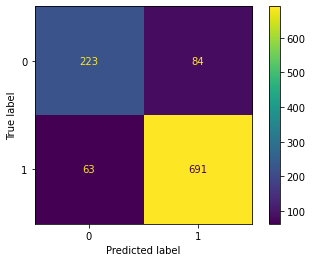

In [70]:
KNN_model_score = (KNN_model.score(X_train, y_train)*100)
print('Accuracy Score for Training Set is : ',KNN_model_score)
print('\n')
plot_confusion_matrix(KNN_model,X_train,y_train)
print(metrics.classification_report(y_train,y_train_predict_KNN))

From the above we can say the following for Training,

1. Accuracy/Model score for Training Set is **86.14** which is shows that our model is perfoming good.
2. Precision for Labour (Class = 1) is **0.89** & Recall for Labour (Class = 1) is **0.92** which is good.
3. From the confusion matrix we can see that our model predicted Labour (Class = 1) **691 times** correctly which is good prediction

#### Performance Matrix on Test Data Set

Accuracy Score for Training Set is :  82.23684210526315


              precision    recall  f1-score   support

           0       0.77      0.67      0.72       153
           1       0.84      0.90      0.87       303

    accuracy                           0.82       456
   macro avg       0.81      0.78      0.79       456
weighted avg       0.82      0.82      0.82       456



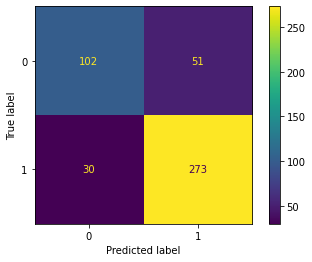

In [71]:
KNN_model_score_test = (KNN_model.score(X_test, y_test)*100)
print('Accuracy Score for Training Set is : ',KNN_model_score_test)
print('\n')
plot_confusion_matrix(KNN_model,X_test,y_test)
print(metrics.classification_report(y_test,y_test_predict_KNN))

From the above we can say the following for Test data-set,

1. Accuracy/Model score for Test Set is **82.23** which is shows that our model is perfoming good.
2. Precision for Labour (Class = 1) is **0.84** & Recall for Labour (Class = 1) is **0.90** which shows that our model is predicting good in our test set.
3. From the confusion matrix we can see that our model predicted Labour (Class = 1) 273 times correctly which is good prediction

### Naïve Bayes Model

In [72]:
from sklearn.naive_bayes import GaussianNB # Importing Gaussian NB from sklearn library

In [73]:
NB_Model = GaussianNB()
NB_Model.fit(X_train, y_train)

GaussianNB()

#### Predicting on Training and Test dataset

In [74]:
y_train_predict_NB = NB_Model.predict(X_train)
y_test_predict_NB = NB_Model.predict(X_test)

#### Performance Matrix on Training Data Set

Accuracy Score for Training Set is :  83.50612629594723


              precision    recall  f1-score   support

           0       0.73      0.69      0.71       307
           1       0.88      0.90      0.89       754

    accuracy                           0.84      1061
   macro avg       0.80      0.79      0.80      1061
weighted avg       0.83      0.84      0.83      1061



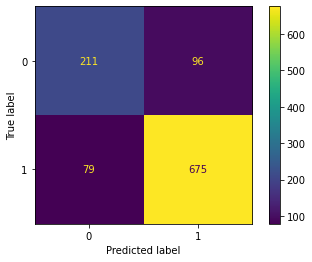

In [75]:
NB_model_score = (NB_Model.score(X_train, y_train)*100)
print('Accuracy Score for Training Set is : ',NB_model_score)
print('\n')
plot_confusion_matrix(NB_Model,X_train,y_train)
print(metrics.classification_report(y_train,y_train_predict_NB))

From the above we can say the following for Training,

1. Accuracy/Model score for Training Set is **83.50** which is shows that our model is perfoming good.
2. Precision for Labour (Class = 1) is **0.88** & Recall for Labour (Class = 1) is **0.90** which is good.
3. From the confusion matrix we can see that our model predicted Labour (Class = 1) **675 times** correctly which is good prediction

#### Performance Matrix on Test Data Set

Accuracy Score for Test Set is :  82.23684210526315


              precision    recall  f1-score   support

           0       0.74      0.73      0.73       153
           1       0.87      0.87      0.87       303

    accuracy                           0.82       456
   macro avg       0.80      0.80      0.80       456
weighted avg       0.82      0.82      0.82       456



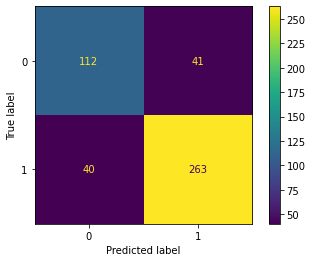

In [76]:
NB_model_score_test = (NB_Model.score(X_test, y_test)*100)
print('Accuracy Score for Test Set is : ',NB_model_score_test)
print('\n')
plot_confusion_matrix(NB_Model,X_test,y_test)
print(metrics.classification_report(y_test,y_test_predict_NB))

From the above we can say the following for Test data-set,

1. Accuracy/Model score for Test Set is **82.23** which is shows that our model is perfoming good.
2. Precision for Labour (Class = 1) is **0.87** & Recall for Labour (Class = 1) is **0.87** which shows that our model is predicting marginally good in our test set.
3. From the confusion matrix we can see that our model predicted Labour (Class = 1) 263 times correctly which is marginally good prediction

In [77]:
precision_train_knn = 89 
recall_train_knn = 92
precision_test_knn =  84
recall_test_knn = 90
precision_train_nb = 88
recall_train_nb = 90
precision_test_nb = 87
recall_test_nb = 87

index = ['Accuracy','Precision','Recall']

compare_knn_nb = pd.DataFrame({ 'KNN Train' : [KNN_model_score,precision_train_knn, recall_train_knn],
                                'KNN Test' :  [KNN_model_score_test,precision_test_knn,recall_test_knn],    
                                 'NB Train' : [NB_model_score,precision_train_nb, recall_train_nb],
                                 'NB Test' :  [NB_model_score_test,precision_test_nb,recall_test_nb ]}, index = index)
round(compare_knn_nb,2)

,KNN Train,KNN Test,NB Train,NB Test
Accuracy,86.15,82.24,83.51,82.24
Precision,89.00,84.00,88.00,87.00
Recall,92.00,90.00,90.00,87.00


### Comparing Performace Matrix of all four models : Logistic Regression, LDA, KNN & Naive Bayes

In [78]:
index = ['Accuracy','Precision','Recall']

compare_before_tuning = pd.DataFrame({ 'Log Regr Train' : [model_score_lgr,precision_train_lgr, recall_train_lgr],
                                       'Log Regr Test' :  [model_score_lgr_test,precision_test_lgr,recall_test_lgr],    
                                       'LDA Train' : [model_score_lda,precision_train_lda, recall_train_lda],
                                       'LDA Test' :  [model_score_lda_test,precision_test_lda,recall_test_lda ],
                                       'KNN Train' : [KNN_model_score,precision_train_knn, recall_train_knn],
                                       'KNN Test' :  [KNN_model_score_test,precision_test_knn,recall_test_knn],    
                                       'NB Train' : [NB_model_score,precision_train_nb, recall_train_nb],
                                       'NB Test' :  [NB_model_score_test,precision_test_nb,recall_test_nb ]}, index = index)

round(compare_before_tuning,2)

,Log Regr Train,Log Regr Test,LDA Train,LDA Test,KNN Train,KNN Test,NB Train,NB Test
Accuracy,83.13,83.55,83.41,83.33,86.15,82.24,83.51,82.24
Precision,86.00,87.00,86.00,86.00,89.00,84.00,88.00,87.00
Recall,91.00,88.00,91.00,89.00,92.00,90.00,90.00,87.00


From the above table we can say the following,

1. Accuracy for Training set is high for KNN model i.e. 86.15
2. KNN Model has good recall value on Train & Test set when compared to other models

Hence based on these values we can say that KNN model is peforming good on our Target variable before model tuning

### 1.6 Model Tuning, Bagging (Random Forest should be applied for Bagging), and Boosting.

### Model Tuning: Logistic Regression (Applying GridSearchCV for model tuning)

In [79]:
from sklearn.model_selection import GridSearchCV #Importing Grid Search CV Library from sklearn 

In [324]:
# Entering the parameters into the grid so as to find optimal parameters using GridSearchCV

grid = {'penalty':['l2','none'],
       'solver':['sag','saga','newton-cg','lbfgs'],
        'max_iter': [500,1000,1500],
        'tol':[0.001,0.0001]}

In [334]:
# Building a GridSearchCV model in order to find best parameters

model = LogisticRegression(max_iter = 1000, random_state = 0)
grid_search = GridSearchCV(estimator = model, param_grid = grid, cv= 3)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=LogisticRegression(max_iter=1000, random_state=0),
             param_grid={'max_iter': [500, 1000, 1500],
                         'penalty': ['l2', 'none'],
                         'solver': ['sag', 'saga', 'newton-cg', 'lbfgs'],
                         'tol': [0.001, 0.0001]})

#### Getting Best Parameters for Logistic Regression

In [335]:
print(grid_search.best_params_,'\n')

{'max_iter': 500, 'penalty': 'none', 'solver': 'sag', 'tol': 0.001} 



In [336]:
#Fitting best parameters into Logistic Regression Model

log_reg = LogisticRegression(max_iter = 500, penalty = 'none', 
                             solver = 'sag', tol = 0.001, 
                             random_state = 1, verbose = True, n_jobs = -1)

# Max_iteration = 500, means the model will stop after 500 iteration if it is unable to find optimal values
# Penalty = None, means regularization is not required
# Solver = 'sag' performs fast on huge data set
# n_jobs = -1 uses all the processors available
# verbose = True, means displays all the parameters used for builing the model

#Fitting our Logistic Regression Model to our Train set
log_reg.fit(X_train,y_train)

convergence after 26 epochs took 0 seconds


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


LogisticRegression(max_iter=500, n_jobs=-1, penalty='none', random_state=1,
                   solver='sag', tol=0.001, verbose=True)

#### Predicting on Train & Test Set

In [337]:
ytrain_pred_log_reg = log_reg.predict(X_train)
ytest_pred_log_reg = log_reg.predict(X_test)

#### Coefficients of the features

In [338]:
for idx, col_name in enumerate(X_train.columns):
    print('The coeff of {} is {}'.format(col_name, log_reg.coef_[0][idx]))

The coeff of age is -0.23551138802037014
The coeff of economic.cond.national is 0.6413131463029488
The coeff of economic.cond.household is 0.06313777828116227
The coeff of Blair is 0.6063884880236599
The coeff of Hague is -0.8273921867222934
The coeff of Europe is -0.21088859545256108
The coeff of political.knowledge is -0.32293045861421676
The coeff of gender_male is 0.20069348934293163


**From the above we can say that following are important features**

1. Hague (Assessment of the Conservative Leader)
2. Assessment of Current National Economic
3. Blair (Assessment of Labour Leader)

### LDA Model with GridSearchCV

In [341]:
# Entering the parameters into the grid1 so as to find optimal parameters using GridSearchCV

grid1 = {'solver':['svd','lsqr','eigen'],
        'tol':[0.001,0.0001],
        'shrinkage': [None],
         'n_components': [None]}

In [342]:
# Building a GridSearchCV model and will fit it into our Train set in order to find best parameters

model1 = LinearDiscriminantAnalysis()
grid_search1 = GridSearchCV(estimator = model1, param_grid = grid1, cv= 3)
grid_search1.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=LinearDiscriminantAnalysis(),
             param_grid={'n_components': [None], 'shrinkage': [None],
                         'solver': ['svd', 'lsqr', 'eigen'],
                         'tol': [0.001, 0.0001]})

#### Getting Best Parameters for LDA

In [343]:
print(grid_search1.best_params_,'\n')

{'n_components': None, 'shrinkage': None, 'solver': 'svd', 'tol': 0.001} 



In [344]:
#Fitting best parameters into Linear Discriminant Analysis Model
lda = LinearDiscriminantAnalysis(solver = 'svd', shrinkage = None, n_components = None, tol = 0.001, priors=None)

#solver = 'svd', does not calculate covariance matrix
#n_components = None, its generally used for dimenisional reduction in this case it's not required
#priors = None, prior probabilities is none

#Fitting our Linear Discriminant Analysis Model to our Train set
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis(tol=0.001)

#### Predicting on Train & Test Set

In [345]:
ytrain_pred_lda = lda.predict(X_train)
ytest_pred_lda = lda.predict(X_test)

### KNN Model with Tuning 

In [348]:
# Entering the parameters into the grid2 so as to find optimal parameters using GridSearchCV

grid2 = {'n_neighbors':[5,7,9,11,13,15,17,19],
        'weights':['uniform'],
         'leaf_size' : [30,50,70],
         'algorithm' : ['auto']}

In [349]:
# Building a GridSearchCV model and will fit it into our Train set in order to find best parameters

model2 = KNeighborsClassifier(n_neighbors = 5, weights='uniform', algorithm='auto', leaf_size=30)
grid_search2 = GridSearchCV(estimator = model2, param_grid = grid2, cv= 3)
grid_search2.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto'], 'leaf_size': [30, 50, 70],
                         'n_neighbors': [5, 7, 9, 11, 13, 15, 17, 19],
                         'weights': ['uniform']})

#### Getting Best Parameters for KNN Model

In [350]:
print(grid_search2.best_params_,'\n')

{'algorithm': 'auto', 'leaf_size': 30, 'n_neighbors': 9, 'weights': 'uniform'} 



In [351]:
#Fitting best parameters into KNN Model

knn = grid_search2.best_estimator_ 

#### Predicting on Train & Test Set

In [474]:
ytrain_pred_knn = knn.predict(X_train)
ytest_pred_knn = knn.predict(X_test)

### Naive Bayes Model with Tunning

In [382]:
# Entering the parameters into the grid2 so as to find optimal parameters using GridSearchCV

grid3 = {'var_smoothing':[1e-9,1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3]}

In [383]:
# Building a GridSearchCV model and will fit it into our Train set in order to find best parameters

model3 = GaussianNB(priors = None)
grid_search3 = GridSearchCV(estimator = model3, param_grid = grid3, cv= 3)
grid_search3.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=GaussianNB(),
             param_grid={'var_smoothing': [1e-09, 1e-08, 1e-07, 1e-06, 1e-05,
                                           0.0001, 0.001]})

#### Getting best parameters for NB Model

In [384]:
print(grid_search3.best_params_,'\n')

{'var_smoothing': 0.001} 



In [389]:
#Building our Naive Bayes Model using best parameters from GridSearchCV

nb = GaussianNB(priors=None, var_smoothing= 0.001)

#Fitting our Naive Bayes Model to our Train set
nb.fit(X_train, y_train)

GaussianNB(var_smoothing=0.001)

#### Predicting on Train and Test Set

In [386]:
ytrain_pred_nb = nb.predict(X_train)
ytest_pred_nb = nb.predict(X_test)

### Bagging (Using Random Forest)

In [395]:
from sklearn.ensemble import BaggingClassifier # Importing Bagging Classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier # Importing Random Forest Classifier from sklearn library

In [402]:
#Using GridSearchCV for getting best parameters for building Random Forest Classifier

param_grid = {
    'max_depth': [6,7,8],
    'max_features': [6,7,8],
    'min_samples_leaf': [10,20,30],
    'min_samples_split': [30, 60,90],
    'n_estimators': [301, 501]
}

rfcl = RandomForestClassifier()

grid_search_rf = GridSearchCV(estimator = rfcl, param_grid = param_grid, cv= 3)
grid_search_rf.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [6, 7, 8], 'max_features': [6, 7, 8],
                         'min_samples_leaf': [10, 20, 30],
                         'min_samples_split': [30, 60, 90],
                         'n_estimators': [301, 501]})

#### Getting Best Parameters

In [403]:
print(grid_search_rf.best_params_,'\n')

{'max_depth': 7, 'max_features': 6, 'min_samples_leaf': 10, 'min_samples_split': 30, 'n_estimators': 501} 



In [414]:
# First we will build random forest classifier model

rf_model = RandomForestClassifier(max_depth = 7, max_features = 6, 
                                  min_samples_leaf = 10,min_samples_split = 30, 
                                  n_estimators = 501)

In [415]:
# Keeping the random forest model as base estimator for our bagging classifier

Bagging_model=BaggingClassifier(base_estimator=rf_model,random_state=1)

#Fitting the model into our Training set
Bagging_model.fit(X_train, y_train)

BaggingClassifier(base_estimator=RandomForestClassifier(max_depth=7,
                                                        max_features=6,
                                                        min_samples_leaf=10,
                                                        min_samples_split=30,
                                                        n_estimators=501),
                  random_state=1)

#### Predicting on Train & Test Data

In [416]:
y_train_predict_bag = Bagging_model.predict(X_train)
y_test_predict_bag = Bagging_model.predict(X_test)

### Boosting : Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier #Importing Gradient Boosting Classifier from sklearn

In [424]:
#Building Gradient Boosting Classifier model
gbcl = GradientBoostingClassifier(random_state=1)

#Fitting our model to the training set
gbcl = gbcl.fit(X_train, y_train)

#### Predicting on Training & Test Set

In [425]:
y_train_pred_gbcl = gbcl.predict(X_train)
y_test_pred_gbcl = gbcl.predict(X_test)

### Boosting : Adaptive Boosting

In [428]:
from sklearn.ensemble import AdaBoostClassifier #Importing Adaptive Boosting Classifier from sklearn

In [429]:
#Building Adaptive Boosting Classifier model
adb_model = AdaBoostClassifier(n_estimators=100,random_state=1)

#Fitting our model to the training set
adb_model.fit(X_train,y_train)

AdaBoostClassifier(n_estimators=100, random_state=1)

#### Predicting on Training & Test Set

In [430]:
y_train_pred_adb = adb_model.predict(X_train)
y_test_pred_adb  = adb_model.predict(X_test)

### 1.7 Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model. Final Model: Compare the models and write inference which model is best/optimized

### Performance Metrics : 1. Logistic Regression Model

#### Accuracy of Training and Test Set :

In [436]:
log_score_train = (log_reg.score(X_train,y_train)*100)
print('Accuracy Score for Logistic Regression Training Set is : ', log_score_train)

Accuracy Score for Logistic Regression Training Set is :  83.12912346842602


In [438]:
log_score_test = (log_reg.score(X_test,y_test)*100)
print('Accuracy Score for Logistic Regression Test Set is : ', log_score_test)

Accuracy Score for Logistic Regression Test Set is :  83.1140350877193


#### Confusion Matrix for Training and Test:

##### Training Set : Logistic Regression

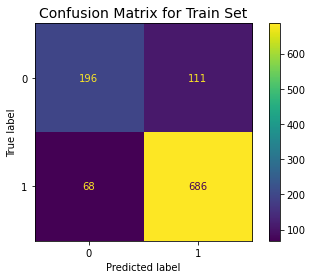

In [445]:
plot_confusion_matrix(log_reg,X_train,y_train)
plt.title('Confusion Matrix for Train Set', fontsize = 14)
plt.show()

1. From the confusion matrix we can see that our model predicted **Labour (Class = 1) 686 times**
2. From the confusion matrix we can see that our model predicted **Conservative (Class = 0) 196 times**

##### Test Set : Logistic Regression

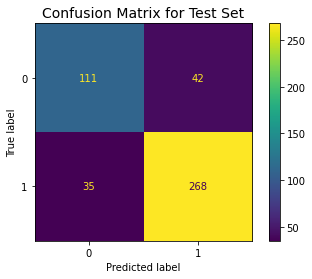

In [446]:
plot_confusion_matrix(log_reg,X_test,y_test)
plt.title('Confusion Matrix for Test Set', fontsize = 14)
plt.show()

1. From the confusion matrix we can see that our model predicted **Labour (Class = 1) 268 times**
2. From the confusion matrix we can see that our model predicted **Conservative (Class = 0) 111 times**

#### Classification Report for Training and Test Set

##### Training Set: Logistic Regression

In [450]:
print(metrics.classification_report(y_train,ytrain_pred_log_reg))

              precision    recall  f1-score   support

           0       0.74      0.64      0.69       307
           1       0.86      0.91      0.88       754

    accuracy                           0.83      1061
   macro avg       0.80      0.77      0.79      1061
weighted avg       0.83      0.83      0.83      1061



From the above report we can say the following for Training set,

1. Precision for Class = 0 (Conservative) is **0.74**
2. Recall for Class = 0 (Conservative) is **0.64**
3. Precision for Class = 1 (Labour) is **0.86**
4. Recall for Class = 1 (Labour) is **0.91**

##### Test Set: Logistic Regression

In [451]:
print(metrics.classification_report(y_test,ytest_pred_log_reg))

              precision    recall  f1-score   support

           0       0.76      0.73      0.74       153
           1       0.86      0.88      0.87       303

    accuracy                           0.83       456
   macro avg       0.81      0.80      0.81       456
weighted avg       0.83      0.83      0.83       456



From the above report we can say the following for Test set,

1. Precision for Class = 0 (Conservative) is **0.76**
2. Recall for Class = 0 (Conservative) is **0.73**
3. Precision for Class = 1 (Labour) is **0.86**
4. Recall for Class = 1 (Labour) is **0.88**

By Comparing both the Training & Test set we can see that our model performs well. But there is no improvement when compared to earlier model i.e. not tuned model

#### AUC Score & ROC Curve for Training & Test Set

AUC for Training 89.00068257026584
AUC for Test 88.2611790590824


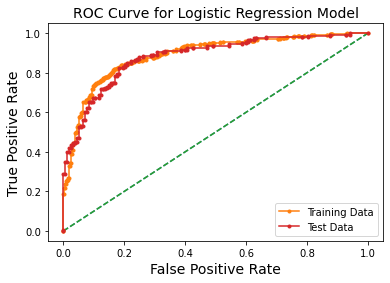

In [455]:
### Training
probs =  log_reg.predict_proba(X_train)
probs = probs[:,1]
plt.title('ROC Curve for Logistic Regression Model',fontsize = 14)
plt.ylabel('True Positive Rate',fontsize = 14)
plt.xlabel('False Positive Rate',fontsize = 14)
auc = roc_auc_score(y_train,probs)
print('AUC for Training', auc*100)
fpr,tpr,thres = roc_curve(y_train, probs)
plt.plot([0,1],[0,1],linestyle = '--')
plt.plot(fpr,tpr,marker = '.',label = 'Training Data')

###Test
probs2 =  log_reg.predict_proba(X_test)
probs2 = probs2[:,1]
auc1 = roc_auc_score(y_test,probs2)
print('AUC for Test', auc1*100)
fpr,tpr,thres = roc_curve(y_test, probs2)
plt.plot([0,1],[0,1],linestyle = '--')
plt.plot(fpr,tpr,marker = '.',label = 'Test Data')
plt.legend(loc = 'best')
plt.show()

### 2. Linear Discriminant Analysis

#### Accuracy of Training and Test Set :

In [459]:
lda_score_train = (lda.score(X_train,y_train)*100)
print('Accuracy Score for Linear Discriminant Analysis Training Set is : ', lda_score_train)

Accuracy Score for Linear Discriminant Analysis Training Set is :  83.41187558906692


In [460]:
lda_score_test = (lda.score(X_test,y_test)*100)
print('Accuracy Score for Linear Discriminant Analysis Test Set is : ',lda_score_test)

Accuracy Score for Linear Discriminant Analysis Test Set is :  83.33333333333334


#### Confusion Matrix for Training and Test Set:

##### Training Set

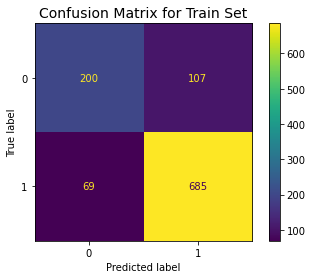

In [461]:
plot_confusion_matrix(lda,X_train,y_train)
plt.title('Confusion Matrix for Train Set', fontsize = 14)
plt.show()

1. From the confusion matrix we can see that our model predicted **Labour (Class = 1) 685 times**
2. From the confusion matrix we can see that our model predicted **Conservative (Class = 0) 200 times**

##### Test Set:

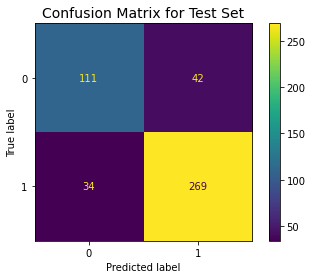

In [462]:
plot_confusion_matrix(lda,X_test,y_test)
plt.title('Confusion Matrix for Test Set', fontsize = 14)
plt.show()

1. From the confusion matrix we can see that our model predicted **Labour (Class = 1) 269 times**
2. From the confusion matrix we can see that our model predicted **Conservative (Class = 0) 111 times**

#### Classification Report for Training and Test Set

##### Training Set: Linear Discriminant Analysis

In [463]:
print(metrics.classification_report(y_train,ytrain_pred_lda))

              precision    recall  f1-score   support

           0       0.74      0.65      0.69       307
           1       0.86      0.91      0.89       754

    accuracy                           0.83      1061
   macro avg       0.80      0.78      0.79      1061
weighted avg       0.83      0.83      0.83      1061



From the above report we can say the following for Training set,

1. Precision for Class = 0 (Conservative) is **0.74**
2. Recall for Class = 0 (Conservative) is **0.65**
3. Precision for Class = 1 (Labour) is **0.86**
4. Recall for Class = 1 (Labour) is **0.91**

##### Test Set: Linear Discriminant Analysis

In [464]:
print(metrics.classification_report(y_test,ytest_pred_lda))

              precision    recall  f1-score   support

           0       0.77      0.73      0.74       153
           1       0.86      0.89      0.88       303

    accuracy                           0.83       456
   macro avg       0.82      0.81      0.81       456
weighted avg       0.83      0.83      0.83       456



From the above report we can say the following for Test set,

1. Precision for Class = 0 (Conservative) is **0.77**
2. Recall for Class = 0 (Conservative) is **0.73**
3. Precision for Class = 1 (Labour) is **0.86**
4. Recall for Class = 1 (Labour) is **0.89**

By Comparing both the Training & Test set we can see that our model performs well. But there is no improvement when compared to earlier model i.e. not tuned model

#### AUC Score & ROC Curve for Training & Test Set

AUC for Training 88.93674560865395
AUC for Test 88.76377833861817


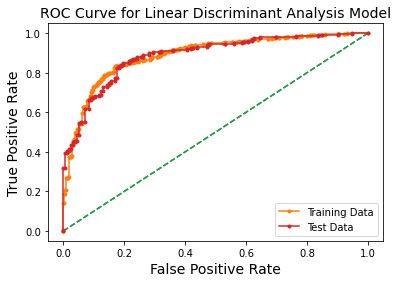

In [465]:
### Training
probs3 =  lda.predict_proba(X_train)
probs3 = probs3[:,1]
plt.title('ROC Curve for Linear Discriminant Analysis Model',fontsize = 14)
plt.ylabel('True Positive Rate',fontsize = 14)
plt.xlabel('False Positive Rate',fontsize = 14)
auc3 = roc_auc_score(y_train,probs3)
print('AUC for Training', auc3*100)
fpr,tpr,thres = roc_curve(y_train, probs3)
plt.plot([0,1],[0,1],linestyle = '--')
plt.plot(fpr,tpr,marker = '.',label = 'Training Data')

### Test
probs4 =  lda.predict_proba(X_test)
probs4 = probs4[:,1]
auc4 = roc_auc_score(y_test,probs4)
print('AUC for Test', auc4*100)
fpr,tpr,thres = roc_curve(y_test, probs4)
plt.plot([0,1],[0,1],linestyle = '--')
plt.plot(fpr,tpr,marker = '.',label = 'Test Data')
plt.legend(loc = 'best')
plt.show()

### 3. K-Nearest Neighbours Classifier (KNN)

#### Accuracy of Training and Test Set :

In [466]:
knn_score_train = (knn.score(X_train,y_train)*100)
print('Accuracy Score for KNN Model Training Set is : ',knn_score_train)

Accuracy Score for KNN Model Training Set is :  85.29688972667296


In [467]:
knn_score_test = (knn.score(X_test,y_test)*100)
print('Accuracy Score for KNN Model Test Set is : ',knn_score_test)

Accuracy Score for KNN Model Test Set is :  82.23684210526315


#### Confusion Matrix for Training and Test Set:

##### Training Set

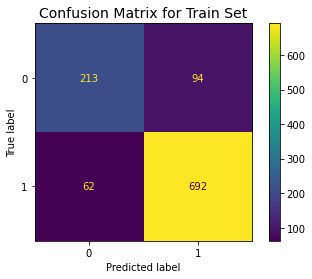

In [468]:
plot_confusion_matrix(knn,X_train,y_train)
plt.title('Confusion Matrix for Train Set', fontsize = 14)
plt.show()

1. From the confusion matrix we can see that our model predicted **Labour (Class = 1) 692 times**
2. From the confusion matrix we can see that our model predicted **Conservative (Class = 0) 213 times**

##### Test Set

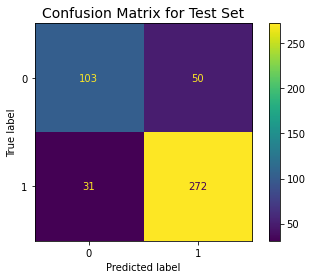

In [470]:
plot_confusion_matrix(knn,X_test,y_test)
plt.title('Confusion Matrix for Test Set', fontsize = 14)
plt.show()

1. From the confusion matrix we can see that our model predicted **Labour (Class = 1) 272 times**
2. From the confusion matrix we can see that our model predicted **Conservative (Class = 0) 103 times**

#### Classification Report for Training and Test Set

##### Training Set: KNN Model

In [471]:
print(metrics.classification_report(y_train,ytrain_pred_knn))

              precision    recall  f1-score   support

           0       0.77      0.69      0.73       307
           1       0.88      0.92      0.90       754

    accuracy                           0.85      1061
   macro avg       0.83      0.81      0.82      1061
weighted avg       0.85      0.85      0.85      1061



From the above report we can say the following for Training set,

1. Precision for Class = 0 (Conservative) is **0.77**
2. Recall for Class = 0 (Conservative) is **0.69**
3. Precision for Class = 1 (Labour) is **0.88**
4. Recall for Class = 1 (Labour) is **0.92**

##### Test Set: KNN Model

In [472]:
print(metrics.classification_report(y_test,ytest_pred_knn))

              precision    recall  f1-score   support

           0       0.77      0.67      0.72       153
           1       0.84      0.90      0.87       303

    accuracy                           0.82       456
   macro avg       0.81      0.79      0.79       456
weighted avg       0.82      0.82      0.82       456



From the above report we can say the following for Test set,

1. Precision for Class = 0 (Conservative) is **0.77**
2. Recall for Class = 0 (Conservative) is **0.67**
3. Precision for Class = 1 (Labour) is **0.84**
4. Recall for Class = 1 (Labour) is **0.90**

By Comparing both the Training & Test set we can see that our model performs well. But there is no improvement when compared to earlier model i.e. not tuned model

#### AUC Score & ROC Curve for Training & Test Set

AUC for Training 91.71908345501517
AUC for Test 89.43570827671002


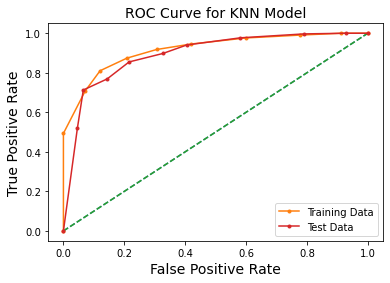

In [477]:
### Training
probs5 =  knn.predict_proba(X_train)
probs5 = probs5[:,1]
plt.title('ROC Curve for KNN Model',fontsize = 14)
plt.ylabel('True Positive Rate',fontsize = 14)
plt.xlabel('False Positive Rate',fontsize = 14)
auc5 = roc_auc_score(y_train,probs5)
print('AUC for Training', auc5*100)
fpr,tpr,thres = roc_curve(y_train, probs5)
plt.plot([0,1],[0,1],linestyle = '--')
plt.plot(fpr,tpr,marker = '.',label = 'Training Data')

### Test
probs6 =  knn.predict_proba(X_test)
probs6 = probs6[:,1]
auc6 = roc_auc_score(y_test,probs6)
print('AUC for Test', auc6*100)
fpr,tpr,thres = roc_curve(y_test, probs6)
plt.plot([0,1],[0,1],linestyle = '--')
plt.plot(fpr,tpr,marker = '.',label = 'Test Data')
plt.legend(loc = 'best')
plt.show()

### 4. Naive Bayes Model

#### Accuracy of Training and Test Set :

In [480]:
nb_score_train = (nb.score(X_train,y_train)*100)
print('Accuracy Score for NB Model Training Set is : ', nb_score_train)

Accuracy Score for NB Model Training Set is :  83.50612629594723


In [481]:
nb_score_test = (nb.score(X_test,y_test)*100)
print('Accuracy Score for NB Model Test Set is : ',nb_score_test)

Accuracy Score for NB Model Test Set is :  82.45614035087719


#### Confusion Matrix for Training and Test Set:

##### Training Set

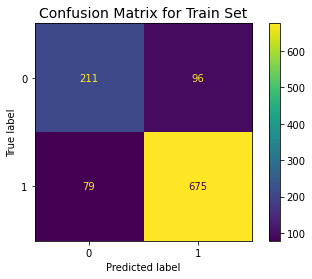

In [478]:
plot_confusion_matrix(nb,X_train,y_train)
plt.title('Confusion Matrix for Train Set', fontsize = 14)
plt.show()

1. From the confusion matrix we can see that our model predicted **Labour (Class = 1) 675 times**
2. From the confusion matrix we can see that our model predicted **Conservative (Class = 0) 211 times**

##### Test Set

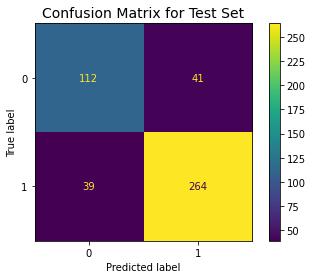

In [479]:
plot_confusion_matrix(nb,X_test,y_test)
plt.title('Confusion Matrix for Test Set', fontsize = 14)
plt.show()

1. From the confusion matrix we can see that our model predicted **Labour (Class = 1) 264 times**
2. From the confusion matrix we can see that our model predicted **Conservative (Class = 0) 112 times**

#### Classification Report for Training and Test Set

##### Training Set: NB Model

In [484]:
print(metrics.classification_report(y_train,ytrain_pred_nb))

              precision    recall  f1-score   support

           0       0.73      0.69      0.71       307
           1       0.88      0.90      0.89       754

    accuracy                           0.84      1061
   macro avg       0.80      0.79      0.80      1061
weighted avg       0.83      0.84      0.83      1061



From the above report we can say the following for Training set,

1. Precision for Class = 0 (Conservative) is **0.73**
2. Recall for Class = 0 (Conservative) is **0.69**
3. Precision for Class = 1 (Labour) is **0.88**
4. Recall for Class = 1 (Labour) is **0.90**

##### Test Set: NB Model

In [483]:
print(metrics.classification_report(y_test,ytest_pred_nb))

              precision    recall  f1-score   support

           0       0.74      0.73      0.74       153
           1       0.87      0.87      0.87       303

    accuracy                           0.82       456
   macro avg       0.80      0.80      0.80       456
weighted avg       0.82      0.82      0.82       456



From the above report we can say the following for Test set,

1. Precision for Class = 0 (Conservative) is **0.74**
2. Recall for Class = 0 (Conservative) is **0.73**
3. Precision for Class = 1 (Labour) is **0.87**
4. Recall for Class = 1 (Labour) is **0.87**

By Comparing both the Training & Test set we can see that our model performs well. But there is no improvement when compared to earlier model i.e. not tuned model

#### AUC Score & ROC Curve for Training & Test Set

AUC for Training 88.79159142553503
AUC for Test 87.66366832761709


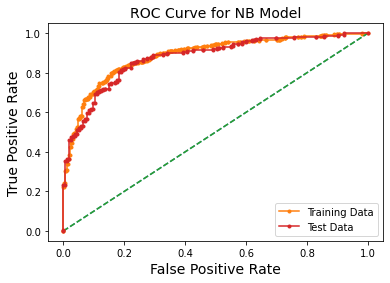

In [485]:
### Training
probs7 =  nb.predict_proba(X_train)
probs7 = probs7[:,1]
plt.title('ROC Curve for NB Model',fontsize = 14)
plt.ylabel('True Positive Rate',fontsize = 14)
plt.xlabel('False Positive Rate',fontsize = 14)
auc7 = roc_auc_score(y_train,probs7)
print('AUC for Training', auc7*100)
fpr,tpr,thres = roc_curve(y_train, probs7)
plt.plot([0,1],[0,1],linestyle = '--')
plt.plot(fpr,tpr,marker = '.',label = 'Training Data')

### Test
probs8 =  nb.predict_proba(X_test)
probs8 = probs8[:,1]
auc8 = roc_auc_score(y_test,probs8)
print('AUC for Test', auc8*100)
fpr,tpr,thres = roc_curve(y_test, probs8)
plt.plot([0,1],[0,1],linestyle = '--')
plt.plot(fpr,tpr,marker = '.',label = 'Test Data')
plt.legend(loc = 'best')
plt.show()

### 5. Bagging Model : Random Forest Classifier

#### Accuracy of Training and Test Set :

In [486]:
score_bagging_train = Bagging_model.score(X_train,y_train)
print('Accuracy Score for Bagging Model Training Set is : ', score_bagging_train*100)

Accuracy Score for Bagging Model Training Set is :  85.76814326107446


In [487]:
score_bagging_test = Bagging_model.score(X_test,y_test)
print('Accuracy Score for Bagging Model Test Set is : ', score_bagging_test*100)

Accuracy Score for Bagging Model Test Set is :  82.23684210526315


#### Confusion Matrix for Training and Test Set:

##### Training Set

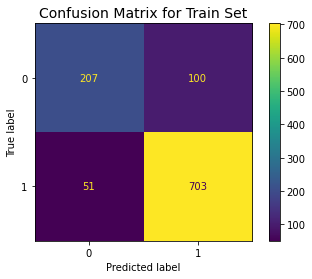

In [488]:
plot_confusion_matrix(Bagging_model,X_train,y_train)
plt.title('Confusion Matrix for Train Set', fontsize = 14)
plt.show()

1. From the confusion matrix we can see that our model predicted **Labour (Class = 1) 703 times**
2. From the confusion matrix we can see that our model predicted **Conservative (Class = 0) 207 times**

##### Test Set

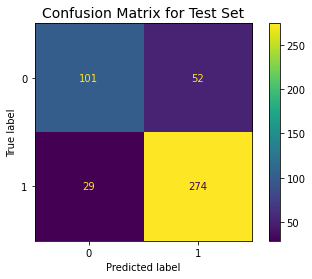

In [489]:
plot_confusion_matrix(Bagging_model,X_test,y_test)
plt.title('Confusion Matrix for Test Set', fontsize = 14)
plt.show()

1. From the confusion matrix we can see that our model predicted **Labour (Class = 1) 274 times**
2. From the confusion matrix we can see that our model predicted **Conservative (Class = 0) 101 times**

#### Classification Report for Training and Test Set

##### Training Set: Bagging Model

In [490]:
print(metrics.classification_report(y_train,y_train_predict_bag))

              precision    recall  f1-score   support

           0       0.80      0.67      0.73       307
           1       0.88      0.93      0.90       754

    accuracy                           0.86      1061
   macro avg       0.84      0.80      0.82      1061
weighted avg       0.85      0.86      0.85      1061



From the above report we can say the following for Training set,

1. Precision for Class = 0 (Conservative) is **0.80**
2. Recall for Class = 0 (Conservative) is **0.67**
3. Precision for Class = 1 (Labour) is **0.88**
4. Recall for Class = 1 (Labour) is **0.93**

##### Test Set: Bagging Model

In [491]:
print(metrics.classification_report(y_test,y_test_predict_bag))

              precision    recall  f1-score   support

           0       0.78      0.66      0.71       153
           1       0.84      0.90      0.87       303

    accuracy                           0.82       456
   macro avg       0.81      0.78      0.79       456
weighted avg       0.82      0.82      0.82       456



From the above report we can say the following for Test set,

1. Precision for Class = 0 (Conservative) is **0.78**
2. Recall for Class = 0 (Conservative) is **0.66**
3. Precision for Class = 1 (Labour) is **0.84**
4. Recall for Class = 1 (Labour) is **0.90**

By Comparing both the Training & Test set we can see that our model performs well

#### AUC Score & ROC Curve for Training & Test Set

AUC for Training 91.24236428515884
AUC for Test 88.86516102590652


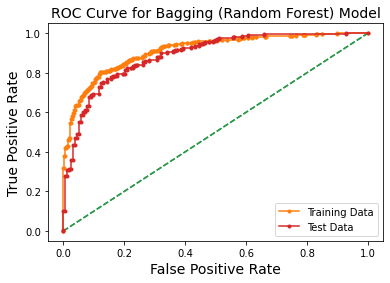

In [492]:
### Training
probs_b =  Bagging_model.predict_proba(X_train)
probs_b = probs_b[:,1]
plt.title('ROC Curve for Bagging (Random Forest) Model',fontsize = 14)
plt.ylabel('True Positive Rate',fontsize = 14)
plt.xlabel('False Positive Rate',fontsize = 14)
auc_b = roc_auc_score(y_train,probs_b)
print('AUC for Training', auc_b*100)
fpr,tpr,thres = roc_curve(y_train, probs_b)
plt.plot([0,1],[0,1],linestyle = '--')
plt.plot(fpr,tpr,marker = '.',label = 'Training Data')

### Test
probs_bt =  Bagging_model.predict_proba(X_test)
probs_bt = probs_bt[:,1]
auc_bt = roc_auc_score(y_test,probs_bt)
print('AUC for Test', auc_bt*100)
fpr,tpr,thres = roc_curve(y_test, probs_bt)
plt.plot([0,1],[0,1],linestyle = '--')
plt.plot(fpr,tpr,marker = '.',label = 'Test Data')
plt.legend(loc = 'best')
plt.show()

### 6. Gradient Boosting

#### Accuracy of Training and Test Set :

In [493]:
score_gbcl_train = gbcl.score(X_train,y_train)
print('Accuracy Score for Gradient Boosting Training Set is : ', score_gbcl_train*100)

Accuracy Score for Gradient Boosting Training Set is :  89.25541941564562


In [494]:
score_gbcl_test = gbcl.score(X_test,y_test)
print('Accuracy Score for Gradient Boosting Test Set is : ', score_gbcl_test*100)

Accuracy Score for Gradient Boosting Test Set is :  83.55263157894737


#### Confusion Matrix for Training and Test Set:

##### Training Set

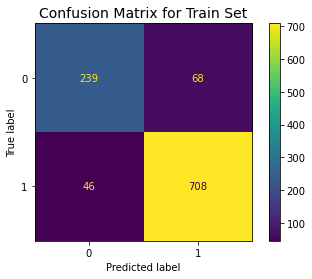

In [497]:
plot_confusion_matrix(gbcl,X_train,y_train)
plt.title('Confusion Matrix for Train Set', fontsize = 14)
plt.show()

1. From the confusion matrix we can see that our model predicted **Labour (Class = 1) 708 times**
2. From the confusion matrix we can see that our model predicted **Conservative (Class = 0) 239 times**

##### Test Set

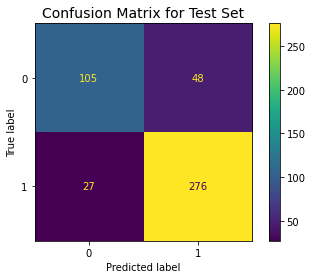

In [498]:
plot_confusion_matrix(gbcl,X_test,y_test)
plt.title('Confusion Matrix for Test Set', fontsize = 14)
plt.show()

1. From the confusion matrix we can see that our model predicted **Labour (Class = 1) 276 times**
2. From the confusion matrix we can see that our model predicted **Conservative (Class = 0) 105 times**

#### Classification Report for Training and Test Set

##### Training Set: Gradient Boosting

In [500]:
print(metrics.classification_report(y_train,y_train_pred_gbcl))

              precision    recall  f1-score   support

           0       0.84      0.78      0.81       307
           1       0.91      0.94      0.93       754

    accuracy                           0.89      1061
   macro avg       0.88      0.86      0.87      1061
weighted avg       0.89      0.89      0.89      1061



From the above report we can say the following for Training set,

1. Precision for Class = 0 (Conservative) is **0.84**
2. Recall for Class = 0 (Conservative) is **0.78**
3. Precision for Class = 1 (Labour) is **0.91**
4. Recall for Class = 1 (Labour) is **0.94**

##### Test Set: Gradient Boosting

In [499]:
print(metrics.classification_report(y_test,y_test_pred_gbcl))

              precision    recall  f1-score   support

           0       0.80      0.69      0.74       153
           1       0.85      0.91      0.88       303

    accuracy                           0.84       456
   macro avg       0.82      0.80      0.81       456
weighted avg       0.83      0.84      0.83       456



From the above report we can say the following for Test set,

1. Precision for Class = 0 (Conservative) is **0.80**
2. Recall for Class = 0 (Conservative) is **0.69**
3. Precision for Class = 1 (Labour) is **0.95**
4. Recall for Class = 1 (Labour) is **0.91**

By Comparing both the Training & Test set we can see that our model performs well

#### AUC Score & ROC Curve for Training & Test Set

AUC for Training 95.1155185373988
AUC for Test 89.92967924243405


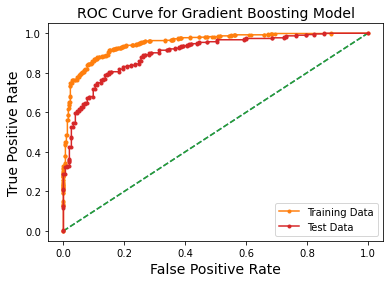

In [501]:
### Training
probs_gb =  gbcl.predict_proba(X_train)
probs_gb = probs_gb[:,1]
plt.title('ROC Curve for Gradient Boosting Model',fontsize = 14)
plt.ylabel('True Positive Rate',fontsize = 14)
plt.xlabel('False Positive Rate',fontsize = 14)
auc_gb = roc_auc_score(y_train,probs_gb)
print('AUC for Training', auc_gb*100)
fpr,tpr,thres = roc_curve(y_train,probs_gb)
plt.plot([0,1],[0,1],linestyle = '--')
plt.plot(fpr,tpr,marker = '.',label = 'Training Data')

### Test
probs_gbt =  gbcl.predict_proba(X_test)
probs_gbt = probs_gbt[:,1]
auc_gbt = roc_auc_score(y_test,probs_gbt)
print('AUC for Test', auc_gbt*100)
fpr,tpr,thres = roc_curve(y_test, probs_gbt)
plt.plot([0,1],[0,1],linestyle = '--')
plt.plot(fpr,tpr,marker = '.',label = 'Test Data')
plt.legend(loc = 'best')
plt.show()

### 7. Adaptive Boosing Model

#### Accuracy of Training and Test Set :

In [495]:
score_adb_train = adb_model.score(X_train,y_train)
print('Accuracy Score for Adaptive Boosting Training Set is : ', score_adb_train*100)

Accuracy Score for Adaptive Boosting Training Set is :  85.01413760603205


In [496]:
score_adb_test = adb_model.score(X_test,y_test)
print('Accuracy Score for Adaptive Boosting Test Set is : ', score_adb_test*100)

Accuracy Score for Adaptive Boosting Test Set is :  81.35964912280701


#### Confusion Matrix for Training and Test Set:

##### Training Set

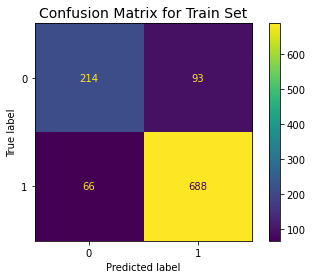

In [502]:
plot_confusion_matrix(adb_model,X_train,y_train)
plt.title('Confusion Matrix for Train Set', fontsize = 14)
plt.show()

1. From the confusion matrix we can see that our model predicted **Labour (Class = 1) 688 times**
2. From the confusion matrix we can see that our model predicted **Conservative (Class = 0) 214 times**

##### Test Set

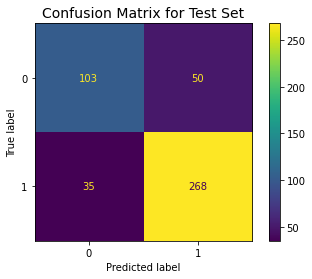

In [503]:
plot_confusion_matrix(adb_model,X_test,y_test)
plt.title('Confusion Matrix for Test Set', fontsize = 14)
plt.show()

1. From the confusion matrix we can see that our model predicted **Labour (Class = 1) 268 times**
2. From the confusion matrix we can see that our model predicted **Conservative (Class = 0) 103 times**

#### Classification Report for Training and Test Set

##### Training Set: Adaptive Boosting

In [504]:
print(metrics.classification_report(y_train,y_train_pred_adb))

              precision    recall  f1-score   support

           0       0.76      0.70      0.73       307
           1       0.88      0.91      0.90       754

    accuracy                           0.85      1061
   macro avg       0.82      0.80      0.81      1061
weighted avg       0.85      0.85      0.85      1061



From the above report we can say the following for Training set,

1. Precision for Class = 0 (Conservative) is **0.76**
2. Recall for Class = 0 (Conservative) is **0.70**
3. Precision for Class = 1 (Labour) is **0.88**
4. Recall for Class = 1 (Labour) is **0.91**

##### Test Set: Adaptive Boosting

In [505]:
print(metrics.classification_report(y_test,y_test_pred_adb))

              precision    recall  f1-score   support

           0       0.75      0.67      0.71       153
           1       0.84      0.88      0.86       303

    accuracy                           0.81       456
   macro avg       0.79      0.78      0.79       456
weighted avg       0.81      0.81      0.81       456



From the above report we can say the following for Test set,

1. Precision for Class = 0 (Conservative) is **0.75**
2. Recall for Class = 0 (Conservative) is **0.67**
3. Precision for Class = 1 (Labour) is **0.84**
4. Recall for Class = 1 (Labour) is **0.88**

By Comparing both the Training & Test set we can see that our model performs well

#### AUC Score & ROC Curve for Training & Test Set

AUC for Training 91.48061586846266
AUC for Test 87.73808753424362


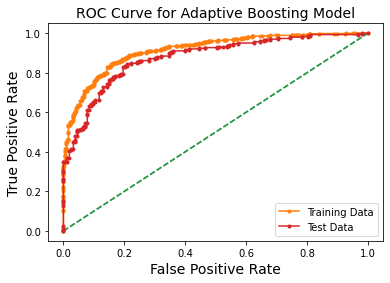

In [506]:
### Training
probs_ad =  adb_model.predict_proba(X_train)
probs_ad = probs_ad[:,1]
plt.title('ROC Curve for Adaptive Boosting Model',fontsize = 14)
plt.ylabel('True Positive Rate',fontsize = 14)
plt.xlabel('False Positive Rate',fontsize = 14)
auc_ad = roc_auc_score(y_train,probs_ad)
print('AUC for Training', auc_ad*100)
fpr,tpr,thres = roc_curve(y_train,probs_ad)
plt.plot([0,1],[0,1],linestyle = '--')
plt.plot(fpr,tpr,marker = '.',label = 'Training Data')

### Test
probs_adt =  adb_model.predict_proba(X_test)
probs_adt = probs_adt[:,1]
auc_adt = roc_auc_score(y_test,probs_adt)
print('AUC for Test', auc_adt*100)
fpr,tpr,thres = roc_curve(y_test, probs_adt)
plt.plot([0,1],[0,1],linestyle = '--')
plt.plot(fpr,tpr,marker = '.',label = 'Test Data')
plt.legend(loc = 'best')
plt.show()

### Comparision for Prediction of Class = 1 (Labour) of All the models

In [507]:
model_performance_metrics = pd.read_excel('performance_metrics.xlsx')
model_performance_metrics

,Model Name,Data Set,Accuracy,Precision,Recall,f1 Score,AUC Score
0,Logistic Regression,Train Set,83.12,86,91,88,89.00
1,Logistic Regression,Test Set,83.11,86,88,87,88.26
2,Linear Discriminant Analysis,Train Set,83.41,86,91,89,88.93
3,Linear Discriminant Analysis,Test Set,83.33,86,89,88,88.76
4,K-Nearest Neighbors,Train Set,85.29,88,92,90,91.71
5,K-Nearest Neighbors,Test Set,82.23,84,90,87,89.43
6,Naïve Bayes,Train Set,83.50,88,90,89,88.79
7,Naïve Bayes,Test Set,82.45,87,87,87,87.66
8,Bagging (Random Forest),Train Set,85.76,88,93,90,91.24
9,Bagging (Random Forest),Test Set,82.23,84,90,87,88.86


From the above table we can see comparision of Performance Metrics of all the models, based on the above table we can say the following,

1. Gradient Boosting (Train Set) is having Highest **Accuracy score** i.e. **89.25**
2. Gradient Boosting (Test Set) is having Highest **Accuracy score** i.e. **83.55**


3. Gradient Boosting (Train Set) is having Highest **Precision value** i.e. **91**
4. Naive Bayes (Test Set) is having Highest **Precision value** i.e. **87**


5. Gradient Boosting (Train Set) is having Highest **Recall** value i.e. **94**
6. Gradient Boosting (Test Set) is having Highest **Recall** value i.e. **91**


7. Gradient Boosting (Train Set) is having Highest **AUC Score** value i.e. **95.11**
8. Gradient Boosting (Test Set) is having Highest **AUC Score** value i.e. **89.92**

Based on the precision, recall and accuracy scores we can say that **Gradient Boosting** model is performing well on the Train and Test data sets. Hence **Gradient Boosting** is best suitable model

### Inference:

### 1.8 Based on these predictions, what are the insights?

We had a business problem where we need to predict which party a voter will vote for on basis of given information. The given data consists of **9 variables** and **1525 observations**. Data set consists of no null values, but has 8 duplicate values which has been removed from the data set.

**Brief about the variables present in the data set**

1. Party Choice : Conservative or Labour (Target Variable)
2. Age 
3. Assessment of Current National Economic conditions
4. Assessment of Current Household Economic conditions
5. Assessment of Labour Leader (Blair)
6. Assessment of Conservative Leader (Hague)
7. Voters attitude towards European Integration
8. Parties positions on European Integration
9. Gender

The target variable consists of two parties i.e. Conservative & Labour

**From EDA Analysis we can understand the following,**

 1. Age of the voters is normally distributed and ranging from 25 to 90. Maximum age of the voter is 93. 
 2. Using the pie-plot we can see that around 69.7% of voters opted for Labour Party and 30.3% of voters opted for Conservative Party. 
 3. Voters mostly voted based on the current national economic conditions. Around 1100 voters given rating of 3 & 4
 4. Voters mostly voted based on the current household economic conditions. Around 1000 voters given rating of 3 & 4
 5. Around **900~950** voters given rating 4 and above for Labour party leader i.e. Blair. Which tells that most of the voters opting for labour leader.
 6. Voters rating for Conservative party leader is 2 & 4, where around 600 voters rated 2 and around 500 voters given 4. Most of the voters rated below 3 which shows the voters opting for conservative party leaders is less.
 7. Around 900 voters inclined towards the Eurpean Integration i.e. scale above 6.
 8. Around 1000 voters are fully aware of the respective parties position on European Integration. 
 9. We can see that most of the female and male voters opting for labour party leader. Around **550** female voters opted for labour party leader. 
 10. Voters of all ages have voted for both Labour and Conservative party. 
 11. Voters of all ages are aware of the respective party stand on Eurpean Integration
 
 After completing EDA, we have build four models initially i.e. Logistic Regression, LDA, KNN and Naive Bayes models. After building the models we have compared all four models and can say that most of them performed well. Based on the performance metrics we can say that **KNN model** performed better with **86.15** train accuracy score and **82.24** test accuracy score with **63.54** vote share for Labour Party. 
 
 In continuation we have tuned the models using GridSearchCV and also built model based on Bagging and Boosting (Gradient & Adaptive). After building the models, we have compared all the seven models and can say that most of them performed well. Based on the performance metrics, we can say that **Gradient Boosting** performed better with **89.25** train accuracy score and **83.55** test accuracy score with **64.86** vote share for Labour Party. 
 
 ***Important Features (Top 4) for predicting exit polls based on the coefficients in Logistic Regression,***
 
 1. Assessment of Conservative Leader (Hague)
 2. Assessment of Current National Economic Conditions
 3. Assessment of Labour Leader (Blair)
 4. Parties positions on European Integration
 
 #### Recommendations:
 
 **Based on our model predictions and insights we can recommend following,**
 
 1. The Labour party supporters across all the ages are highly influenced to a certain extent by high positive perception about strong National Economic Condition and Household Economic Condition.
 
 2. Voters are strongly influenced with European Integration, around 900 voters given scale rating above 6 and by seeing the pair plot we can see that the stand of Labour Party on European Integration takes away voters to Conservative Party to certain extent. This point to rechecked again.
 
 3. Out of the total voters who have voted to Labour Party most of them are Female around 52% of them are female. Labour Party can try ways to attract Male voters to increase the vote bank. 
 
 

## Problem 2:

### In this particular project, we are going to work on the inaugural corpora from the nltk in Python. We will be looking at the following speeches of the Presidents of the United States of America:

#### President Franklin D. Roosevelt in 1941
#### President John F. Kennedy in 1961
#### President Richard Nixon in 1973

#### Importing the necessary libraries along with the standard import

In [2]:
import numpy as np 
import pandas as pd 
import re # this is the regular expression library which helps us manipulate text (strings) fairly easily and intuitively
import nltk # Natural Language Tool Kit which contains a lot of functionalities for text analytics
import matplotlib.pyplot as plt
import string # this is used for string manipulations
import matplotlib

In [6]:
nltk.download('inaugural')
from nltk.corpus import inaugural
inaugural.fileids()

#Importing Text File into individual files

Roosevelt = inaugural.raw('1941-Roosevelt.txt')
Kennedy = inaugural.raw('1961-Kennedy.txt')
Nixon = inaugural.raw('1973-Nixon.txt')

[nltk_data] Downloading package inaugural to
[nltk_data]     C:\Users\Sastry\AppData\Roaming\nltk_data...
[nltk_data]   Package inaugural is already up-to-date!


#### President Franklin D. Roosevelt Speech in 1941

In [8]:
Roosevelt

'On each national day of inauguration since 1789, the people have renewed their sense of dedication to the United States.\n\nIn Washington\'s day the task of the people was to create and weld together a nation.\n\nIn Lincoln\'s day the task of the people was to preserve that Nation from disruption from within.\n\nIn this day the task of the people is to save that Nation and its institutions from disruption from without.\n\nTo us there has come a time, in the midst of swift happenings, to pause for a moment and take stock -- to recall what our place in history has been, and to rediscover what we are and what we may be. If we do not, we risk the real peril of inaction.\n\nLives of nations are determined not by the count of years, but by the lifetime of the human spirit. The life of a man is three-score years and ten: a little more, a little less. The life of a nation is the fullness of the measure of its will to live.\n\nThere are men who doubt this. There are men who believe that democr

#### President John F. Kennedy Speech in 1961

In [30]:
Kennedy

'Vice President Johnson, Mr. Speaker, Mr. Chief Justice, President Eisenhower, Vice President Nixon, President Truman, reverend clergy, fellow citizens, we observe today not a victory of party, but a celebration of freedom -- symbolizing an end, as well as a beginning -- signifying renewal, as well as change. For I have sworn I before you and Almighty God the same solemn oath our forebears l prescribed nearly a century and three quarters ago.\n\nThe world is very different now. For man holds in his mortal hands the power to abolish all forms of human poverty and all forms of human life. And yet the same revolutionary beliefs for which our forebears fought are still at issue around the globe -- the belief that the rights of man come not from the generosity of the state, but from the hand of God.\n\nWe dare not forget today that we are the heirs of that first revolution. Let the word go forth from this time and place, to friend and foe alike, that the torch has been passed to a new gener

#### President Richard Nixon Speech in 1973

In [10]:
Nixon

'Mr. Vice President, Mr. Speaker, Mr. Chief Justice, Senator Cook, Mrs. Eisenhower, and my fellow citizens of this great and good country we share together:\n\nWhen we met here four years ago, America was bleak in spirit, depressed by the prospect of seemingly endless war abroad and of destructive conflict at home.\n\nAs we meet here today, we stand on the threshold of a new era of peace in the world.\n\nThe central question before us is: How shall we use that peace? Let us resolve that this era we are about to enter will not be what other postwar periods have so often been: a time of retreat and isolation that leads to stagnation at home and invites new danger abroad.\n\nLet us resolve that this will be what it can become: a time of great responsibilities greatly borne, in which we renew the spirit and the promise of America as we enter our third century as a nation.\n\nThis past year saw far-reaching results from our new policies for peace. By continuing to revitalize our traditional

### 2.1 Find the number of characters, words, and sentences for the mentioned documents. 

#### Number of Characters : Roosevelt, Kennedy & Nixon

In [14]:
# By using the lenght function we can find out the number of characters in a text file

# Roosevelt Speech
No_of_characters_roosevelt = len(Roosevelt) 
print('Number of Characters in Roosevelt Speech : ', No_of_characters_roosevelt)
print('\n')

# Kennedy Speech
No_of_characters_kennedy = len(Kennedy) 
print('Number of Characters in Kennedy Speech : ', No_of_characters_kennedy)
print('\n')

# Nixon Speech
No_of_characters_nixon = len(Nixon) 
print('Number of Characters in Nixon Speech : ', No_of_characters_nixon)

Number of Characters in Roosevelt Speech :  7571


Number of Characters in Kennedy Speech :  7618


Number of Characters in Nixon Speech :  9991


#### Number of Words : Roosevelt, Kennedy & Nixon

In [21]:
# By using split and length function we can find out the number of words in a text file
# Here split function splits the text into a list of words


# Number of Words in Roosevelt Speech
words_roosevelt = Roosevelt.split()
print('Number of Words in Roosevelt Speech : ', len(words_roosevelt))
print('\n')

# Number of Words in Kennedy Speech
words_kennedy = Kennedy.split()
print('Number of Words in Kennedy Speech : ', len(words_kennedy))
print('\n')

# Number of Words in Nixon Speech
words_nixon = Nixon.split()
print('Number of Words in Nixon Speech : ', len(words_nixon))

Number of Words in Roosevelt Speech :  1360


Number of Words in Kennedy Speech :  1390


Number of Words in Nixon Speech :  1819


#### Number of Sentences : Roosevelt, Kennedy & Nixon

In [57]:
# Importing sent_tokenize function from nltk tokenize library for getting the number of Sentences
from nltk.tokenize import sent_tokenize

In [60]:
# Number of Sentences in Roosevelt Speech
no_of_sentences_roosevelt = sent_tokenize(Roosevelt)
print('Number of Sentences in Roosevelt Speech : ', len(no_of_sentences_roosevelt))
print('\n')

# Number of Sentences in Kennedy Speech
no_of_sentences_kennedy = sent_tokenize(Kennedy)
print('Number of Sentences in Kennedy Speech : ', len(no_of_sentences_kennedy))
print('\n')

# Number of Sentences in Nixon Speech
no_of_sentences_nixon = sent_tokenize(Nixon)
print('Number of Sentences in Nixon Speech : ', len(no_of_sentences_nixon))

Number of Sentences in Roosevelt Speech :  68


Number of Sentences in Kennedy Speech :  52


Number of Sentences in Nixon Speech :  68


### 2.2 Remove all the stopwords from all three speeches.

In [66]:
# Importing Libraries which are required to remove stop words
from nltk.tokenize import word_tokenize 
from nltk.corpus import stopwords

In [104]:
# Defining a variable 'stopwords' which contains the list of punctuations from the string library & the english stopwords

stop_words = nltk.corpus.stopwords.words('english') + list(string.punctuation)

additional_words = ('let', 'us', ',' , '.', '--')

stop_words.extend(additional_words)

#### Removing Stopwords & Cleaning data from Roosevelt Speech

In [140]:
# Converting all the words to lower case as stopwords defined will be in lowercase 
Roosevelt_lower = Roosevelt.lower()

#This function would split the text into individual words
word_tokens_roosevelt = word_tokenize(Roosevelt_lower) 
  
#Looping the text into the stopwords and returning the words which are not in stop words
filtered_sentence = [w for w in word_tokens_roosevelt if not w in stop_words] 
  
filtered_sentence = [] 

#Joining the words which are not in stopwords and storing in new data
for w in word_tokens_roosevelt: 
    if w not in stop_words: 
        filtered_sentence.append(w)
roosevelt_removed_stopwords = " ".join(filtered_sentence)
roosevelt_removed_stopwords

"national day inauguration since 1789 people renewed sense dedication united states washington 's day task people create weld together nation lincoln 's day task people preserve nation disruption within day task people save nation institutions disruption without come time midst swift happenings pause moment take stock recall place history rediscover may risk real peril inaction lives nations determined count years lifetime human spirit life man three-score years ten little little less life nation fullness measure live men doubt men believe democracy form government frame life limited measured kind mystical artificial fate unexplained reason tyranny slavery become surging wave future freedom ebbing tide americans know true eight years ago life republic seemed frozen fatalistic terror proved true midst shock acted acted quickly boldly decisively later years living years fruitful years people democracy brought greater security hope better understanding life 's ideals measured material thi

#### Number of Stopwords in Roosevelt Speech

In [141]:
No_of_Stop_words_roosevelt = len([w for w in word_tokens_roosevelt if w in stop_words])
print('Number of Stop Words in Roosevelt Speech :', No_of_Stop_words_roosevelt)

Number of Stop Words in Roosevelt Speech : 903


#### Removing Stopwords & Cleaning data from Kennedy Speech

In [137]:
# Converting all the words to lower case as stopwords defined will be in lowercase 
Kennedy_lower = Kennedy.lower()

#This function would split the text into individual words
word_tokens_kennedy = word_tokenize(Kennedy_lower) 
  
#Looping the text into the stopwords and returning the words which are not in stop words
filtered_sentence_kennedy = [w for w in word_tokens_kennedy if not w in stop_words] 
  
filtered_sentence_kennedy = [] 

#Joining the words which are not in stopwords and storing in new data
for w in word_tokens_kennedy: 
    if w not in stop_words: 
        filtered_sentence_kennedy.append(w)
kennedy_removed_stopwords = " ".join(filtered_sentence_kennedy)
kennedy_removed_stopwords

"vice president johnson mr. speaker mr. chief justice president eisenhower vice president nixon president truman reverend clergy fellow citizens observe today victory party celebration freedom symbolizing end well beginning signifying renewal well change sworn almighty god solemn oath forebears l prescribed nearly century three quarters ago world different man holds mortal hands power abolish forms human poverty forms human life yet revolutionary beliefs forebears fought still issue around globe belief rights man come generosity state hand god dare forget today heirs first revolution word go forth time place friend foe alike torch passed new generation americans born century tempered war disciplined hard bitter peace proud ancient heritage unwilling witness permit slow undoing human rights nation always committed committed today home around world every nation know whether wishes well ill shall pay price bear burden meet hardship support friend oppose foe order assure survival success l

#### Number of Stopwords in Kennedy Speech

In [144]:
No_of_Stop_words_kennedy = len([w for w in word_tokens_kennedy if w in stop_words])
print('Number of Stop Words in Kennedy Speech :', No_of_Stop_words_kennedy)

Number of Stop Words in Kennedy Speech : 875


#### Removing Stopwords & Cleaning data from Nixon Speech

In [147]:
# Converting all the words to lower case as stopwords defined will be in lowercase 
Nixon_lower = Nixon.lower()

#This function would split the text into individual words
word_tokens_nixon = word_tokenize(Nixon_lower) 
  
#Looping the text into the stopwords and returning the words which are not in stop words
filtered_sentence_nixon = [w for w in word_tokens_nixon if not w in stop_words] 
  
filtered_sentence_nixon = [] 

#Joining the words which are not in stopwords and storing in new data
for w in word_tokens_nixon: 
    if w not in stop_words: 
        filtered_sentence_nixon.append(w)
nixon_removed_stopwords = " ".join(filtered_sentence_nixon)
nixon_removed_stopwords

"mr. vice president mr. speaker mr. chief justice senator cook mrs. eisenhower fellow citizens great good country share together met four years ago america bleak spirit depressed prospect seemingly endless war abroad destructive conflict home meet today stand threshold new era peace world central question shall use peace resolve era enter postwar periods often time retreat isolation leads stagnation home invites new danger abroad resolve become time great responsibilities greatly borne renew spirit promise america enter third century nation past year saw far-reaching results new policies peace continuing revitalize traditional friendships missions peking moscow able establish base new durable pattern relationships among nations world america 's bold initiatives 1972 long remembered year greatest progress since end world war ii toward lasting peace world peace seek world flimsy peace merely interlude wars peace endure generations come important understand necessity limitations america '

#### Number of Stopwords in Nixon Speech

In [148]:
No_of_Stop_words_nixon = len([w for w in word_tokens_nixon if w in stop_words])
print('Number of Stop Words in Nixon :', No_of_Stop_words_nixon)

Number of Stop Words in Nixon : 1206


### 2.3 Which word occurs the most number of times in his inaugural address for each president? Mention the top three words. (after removing the stopwords) 

#### Roosevelt Most Number of Words Occuring Frequently

In [111]:
freq_roosevelt = pd.Series(roosevelt_removed_stopwords.split()).value_counts()[:10]
freq_roosevelt 

nation       12
know         10
spirit        9
democracy     9
life          9
people        7
america       7
freedom       6
years         6
's            5
dtype: int64

From the above we see the most occuring words in Roosevelt Speech. The top three words are 

1. nation : 12 times
2. know   : 10 times # we can even add this in the stop words list
3. spirit : 9 times

#### Kennedy Most Number of Words Occuring Frequently

In [112]:
freq_kennedy = pd.Series(kennedy_removed_stopwords.split()).value_counts()[:10]
freq_kennedy

sides       8
world       8
new         7
pledge      7
ask         5
shall       5
power       5
free        5
citizens    5
nations     5
dtype: int64

From the above we see the most occuring words in Kennedy Speech. The top three words are 

1. sides  : 8 times
2. world  : 8 times 
3. new    : 7 times

#### Nixon Most Number of Words Occuring Frequently

In [113]:
freq_nixon = pd.Series(nixon_removed_stopwords.split()).value_counts()[:10]
freq_nixon

america           21
peace             19
world             18
new               15
's                14
nation            11
responsibility    11
government        10
home               9
great              9
dtype: int64

From the above we see the most occuring words in Nixon Speech. The top three words are 

1. america  : 21 times
2. peace    : 19 times 
3. world    : 18 times

### 2.4 Plot the word cloud of each of the speeches of the variable. (after removing the stopwords)

In [118]:
#Importing wordclound library
from wordcloud import WordCloud

#### Word Cloud for Roosevelt Speech

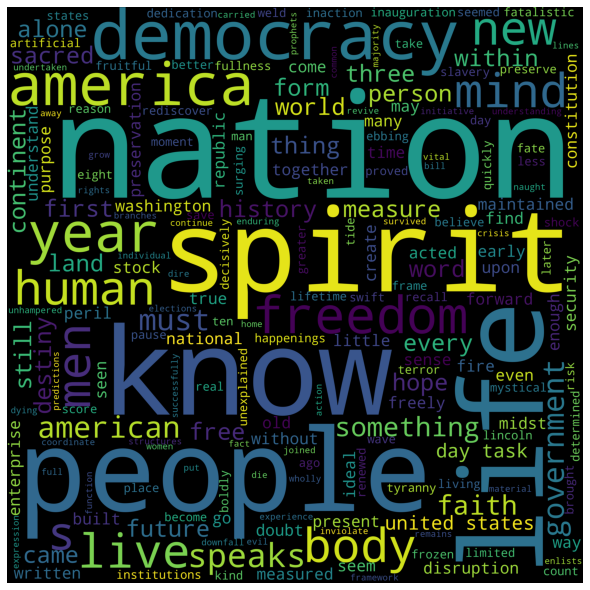

In [121]:
wordcloud_roosevelt = WordCloud(width = 3000, height = 3000, 
                background_color ='black', 
                min_font_size = 10, random_state=100).generate(roosevelt_removed_stopwords) 
  
# ploting the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud_roosevelt) 
plt.axis("off")
plt.xlabel('Word Cloud')
plt.tight_layout(pad = 0) 
plt.show()

#### Word Cloud for Kennedy Speech

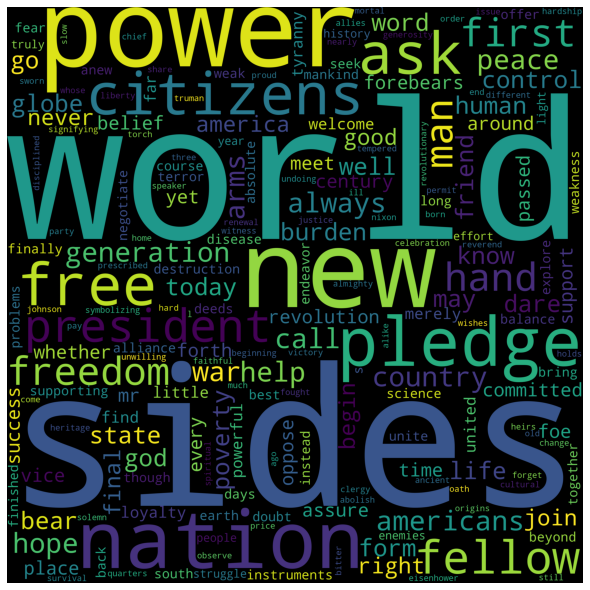

In [120]:
wordcloud_kennedy = WordCloud(width = 3000, height = 3000, 
                background_color ='black', 
                min_font_size = 10, random_state=100).generate(kennedy_removed_stopwords) 
  
# ploting the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud_kennedy) 
plt.axis("off")
plt.xlabel('Word Cloud')
plt.tight_layout(pad = 0) 
plt.show()

#### Word Cloud for Nixon Speech

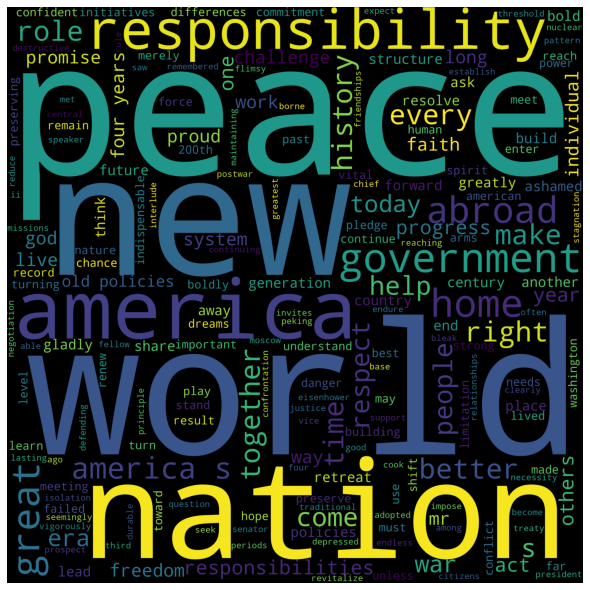

In [152]:
wordcloud_nixon = WordCloud(width = 3000, height = 3000, 
                background_color ='black', 
                min_font_size = 10, random_state=100).generate(nixon_removed_stopwords) 
  
# ploting the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud_nixon) 
plt.axis("off")
plt.xlabel('Word Cloud')
plt.tight_layout(pad = 0) 
plt.show()

********END****************